In [27]:
import glob
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [29]:
all_years = []
for file in glob.glob('Dataset_Raw/79-83/*.nc'):
    print(file[18:22] +" -> This is the year")
    data = Dataset(file, 'r')
    #print(data)
    time = data.variables['time']
    print(time)
    year = file[18:22]
    all_years.append(year)

1982 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (365,)
filling off
1980 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (336,)
filling off
1983 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (365,)
filling off
1979 -> This is the ye

In [30]:
year_start = min(all_years)
year_end = max(all_years)
print(year_start)
print(year_end)

1979
1983


In [14]:
date_range = pd.date_range(start = year_start + '-01-01', end=year_end + '-12-31', freq='D' )
df = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)

In [15]:
df

Temperature
1979-01-01          0.0
1979-01-02          0.0
1979-01-03          0.0
1979-01-04          0.0
1979-01-05          0.0
...                 ...
1983-12-27          0.0
1983-12-28          0.0
1983-12-29          0.0
1983-12-30          0.0
1983-12-31          0.0

[1826 rows x 1 columns]

In [13]:
#defining lat and lon for the location
lat = 28.7041
lon = 77.1025

In [31]:
all_years.sort()

In [32]:
all_years

['1979', '1980', '1981', '1982', '1983']

In [38]:
all_years.sort()
for yr in all_years:
    # reading in the data
    data = Dataset('Dataset_Raw/79-83/' + yr + '.nc', 'r')
    
    # store the latitude and longitude data from the dataset
    latitude = data.variables['latitude'][:]
    longitude = data.variables['longitude'][:]
    
    #squared difference between the specified latitude and longitude 
    sq_diff_lat = (latitude - lat)**2
    sq_diff_lon = (longitude - lon)**2
    
    #identify the index of hte minimum  value for lat and lon
    min_index_lat  = sq_diff_lat.argmin()
    min_index_lon  = sq_diff_lon.argmin()
    
    # accessing the temperature data
    temp = data.variables['TMP_2m']
    
    # creating the date range for each year
    start = str(yr) + '-01-01'
    end = str(yr) + '-12-31'
    d_range = pd.date_range(start=start, end = end , freq='D')
    length = data.variables['TMP_2m'].shape[0]
    for t_index in np.arange(length):
        print('Recording the value for :'+str(d_range[t_index]))
        df.loc[d_range[t_index]]['Temperature'] = temp[t_index , min_index_lat, min_index_lon]

Recording the value for :1979-01-01 00:00:00
Recording the value for :1979-01-02 00:00:00
Recording the value for :1979-01-03 00:00:00
Recording the value for :1979-01-04 00:00:00
Recording the value for :1979-01-05 00:00:00
Recording the value for :1979-01-06 00:00:00
Recording the value for :1979-01-07 00:00:00
Recording the value for :1979-01-08 00:00:00
Recording the value for :1979-01-09 00:00:00
Recording the value for :1979-01-10 00:00:00
Recording the value for :1979-01-11 00:00:00
Recording the value for :1979-01-12 00:00:00
Recording the value for :1979-01-13 00:00:00
Recording the value for :1979-01-14 00:00:00
Recording the value for :1979-01-15 00:00:00
Recording the value for :1979-01-16 00:00:00
Recording the value for :1979-01-17 00:00:00
Recording the value for :1979-01-18 00:00:00
Recording the value for :1979-01-19 00:00:00
Recording the value for :1979-01-20 00:00:00
Recording the value for :1979-01-21 00:00:00
Recording the value for :1979-01-22 00:00:00
Recording 

Recording the value for :1979-07-18 00:00:00
Recording the value for :1979-07-19 00:00:00
Recording the value for :1979-07-20 00:00:00
Recording the value for :1979-07-21 00:00:00
Recording the value for :1979-07-22 00:00:00
Recording the value for :1979-07-23 00:00:00
Recording the value for :1979-07-24 00:00:00
Recording the value for :1979-07-25 00:00:00
Recording the value for :1979-07-26 00:00:00
Recording the value for :1979-07-27 00:00:00
Recording the value for :1979-07-28 00:00:00
Recording the value for :1979-07-29 00:00:00
Recording the value for :1979-07-30 00:00:00
Recording the value for :1979-07-31 00:00:00
Recording the value for :1979-08-01 00:00:00
Recording the value for :1979-08-02 00:00:00
Recording the value for :1979-08-03 00:00:00
Recording the value for :1979-08-04 00:00:00
Recording the value for :1979-08-05 00:00:00
Recording the value for :1979-08-06 00:00:00
Recording the value for :1979-08-07 00:00:00
Recording the value for :1979-08-08 00:00:00
Recording 

Recording the value for :1980-02-25 00:00:00
Recording the value for :1980-02-26 00:00:00
Recording the value for :1980-02-27 00:00:00
Recording the value for :1980-02-28 00:00:00
Recording the value for :1980-02-29 00:00:00
Recording the value for :1980-03-01 00:00:00
Recording the value for :1980-03-02 00:00:00
Recording the value for :1980-03-03 00:00:00
Recording the value for :1980-03-04 00:00:00
Recording the value for :1980-03-05 00:00:00
Recording the value for :1980-03-06 00:00:00
Recording the value for :1980-03-07 00:00:00
Recording the value for :1980-03-08 00:00:00
Recording the value for :1980-03-09 00:00:00
Recording the value for :1980-03-10 00:00:00
Recording the value for :1980-03-11 00:00:00
Recording the value for :1980-03-12 00:00:00
Recording the value for :1980-03-13 00:00:00
Recording the value for :1980-03-14 00:00:00
Recording the value for :1980-03-15 00:00:00
Recording the value for :1980-03-16 00:00:00
Recording the value for :1980-03-17 00:00:00
Recording 

Recording the value for :1980-09-16 00:00:00
Recording the value for :1980-09-17 00:00:00
Recording the value for :1980-09-18 00:00:00
Recording the value for :1980-09-19 00:00:00
Recording the value for :1980-09-20 00:00:00
Recording the value for :1980-09-21 00:00:00
Recording the value for :1980-09-22 00:00:00
Recording the value for :1980-09-23 00:00:00
Recording the value for :1980-09-24 00:00:00
Recording the value for :1980-09-25 00:00:00
Recording the value for :1980-09-26 00:00:00
Recording the value for :1980-09-27 00:00:00
Recording the value for :1980-09-28 00:00:00
Recording the value for :1980-09-29 00:00:00
Recording the value for :1980-09-30 00:00:00
Recording the value for :1980-10-01 00:00:00
Recording the value for :1980-10-02 00:00:00
Recording the value for :1980-10-03 00:00:00
Recording the value for :1980-10-04 00:00:00
Recording the value for :1980-10-05 00:00:00
Recording the value for :1980-10-06 00:00:00
Recording the value for :1980-10-07 00:00:00
Recording 

Recording the value for :1981-05-01 00:00:00
Recording the value for :1981-05-02 00:00:00
Recording the value for :1981-05-03 00:00:00
Recording the value for :1981-05-04 00:00:00
Recording the value for :1981-05-05 00:00:00
Recording the value for :1981-05-06 00:00:00
Recording the value for :1981-05-07 00:00:00
Recording the value for :1981-05-08 00:00:00
Recording the value for :1981-05-09 00:00:00
Recording the value for :1981-05-10 00:00:00
Recording the value for :1981-05-11 00:00:00
Recording the value for :1981-05-12 00:00:00
Recording the value for :1981-05-13 00:00:00
Recording the value for :1981-05-14 00:00:00
Recording the value for :1981-05-15 00:00:00
Recording the value for :1981-05-16 00:00:00
Recording the value for :1981-05-17 00:00:00
Recording the value for :1981-05-18 00:00:00
Recording the value for :1981-05-19 00:00:00
Recording the value for :1981-05-20 00:00:00
Recording the value for :1981-05-21 00:00:00
Recording the value for :1981-05-22 00:00:00
Recording 

Recording the value for :1981-11-07 00:00:00
Recording the value for :1981-11-08 00:00:00
Recording the value for :1981-11-09 00:00:00
Recording the value for :1981-11-10 00:00:00
Recording the value for :1981-11-11 00:00:00
Recording the value for :1981-11-12 00:00:00
Recording the value for :1981-11-13 00:00:00
Recording the value for :1981-11-14 00:00:00
Recording the value for :1981-11-15 00:00:00
Recording the value for :1981-11-16 00:00:00
Recording the value for :1981-11-17 00:00:00
Recording the value for :1981-11-18 00:00:00
Recording the value for :1981-11-19 00:00:00
Recording the value for :1981-11-20 00:00:00
Recording the value for :1981-11-21 00:00:00
Recording the value for :1981-11-22 00:00:00
Recording the value for :1981-11-23 00:00:00
Recording the value for :1981-11-24 00:00:00
Recording the value for :1981-11-25 00:00:00
Recording the value for :1981-11-26 00:00:00
Recording the value for :1981-11-27 00:00:00
Recording the value for :1981-11-28 00:00:00
Recording 

Recording the value for :1982-05-17 00:00:00
Recording the value for :1982-05-18 00:00:00
Recording the value for :1982-05-19 00:00:00
Recording the value for :1982-05-20 00:00:00
Recording the value for :1982-05-21 00:00:00
Recording the value for :1982-05-22 00:00:00
Recording the value for :1982-05-23 00:00:00
Recording the value for :1982-05-24 00:00:00
Recording the value for :1982-05-25 00:00:00
Recording the value for :1982-05-26 00:00:00
Recording the value for :1982-05-27 00:00:00
Recording the value for :1982-05-28 00:00:00
Recording the value for :1982-05-29 00:00:00
Recording the value for :1982-05-30 00:00:00
Recording the value for :1982-05-31 00:00:00
Recording the value for :1982-06-01 00:00:00
Recording the value for :1982-06-02 00:00:00
Recording the value for :1982-06-03 00:00:00
Recording the value for :1982-06-04 00:00:00
Recording the value for :1982-06-05 00:00:00
Recording the value for :1982-06-06 00:00:00
Recording the value for :1982-06-07 00:00:00
Recording 

Recording the value for :1982-11-22 00:00:00
Recording the value for :1982-11-23 00:00:00
Recording the value for :1982-11-24 00:00:00
Recording the value for :1982-11-25 00:00:00
Recording the value for :1982-11-26 00:00:00
Recording the value for :1982-11-27 00:00:00
Recording the value for :1982-11-28 00:00:00
Recording the value for :1982-11-29 00:00:00
Recording the value for :1982-11-30 00:00:00
Recording the value for :1982-12-01 00:00:00
Recording the value for :1982-12-02 00:00:00
Recording the value for :1982-12-03 00:00:00
Recording the value for :1982-12-04 00:00:00
Recording the value for :1982-12-05 00:00:00
Recording the value for :1982-12-06 00:00:00
Recording the value for :1982-12-07 00:00:00
Recording the value for :1982-12-08 00:00:00
Recording the value for :1982-12-09 00:00:00
Recording the value for :1982-12-10 00:00:00
Recording the value for :1982-12-11 00:00:00
Recording the value for :1982-12-12 00:00:00
Recording the value for :1982-12-13 00:00:00
Recording 

Recording the value for :1983-06-10 00:00:00
Recording the value for :1983-06-11 00:00:00
Recording the value for :1983-06-12 00:00:00
Recording the value for :1983-06-13 00:00:00
Recording the value for :1983-06-14 00:00:00
Recording the value for :1983-06-15 00:00:00
Recording the value for :1983-06-16 00:00:00
Recording the value for :1983-06-17 00:00:00
Recording the value for :1983-06-18 00:00:00
Recording the value for :1983-06-19 00:00:00
Recording the value for :1983-06-20 00:00:00
Recording the value for :1983-06-21 00:00:00
Recording the value for :1983-06-22 00:00:00
Recording the value for :1983-06-23 00:00:00
Recording the value for :1983-06-24 00:00:00
Recording the value for :1983-06-25 00:00:00
Recording the value for :1983-06-26 00:00:00
Recording the value for :1983-06-27 00:00:00
Recording the value for :1983-06-28 00:00:00
Recording the value for :1983-06-29 00:00:00
Recording the value for :1983-06-30 00:00:00
Recording the value for :1983-07-01 00:00:00
Recording 

Recording the value for :1983-12-18 00:00:00
Recording the value for :1983-12-19 00:00:00
Recording the value for :1983-12-20 00:00:00
Recording the value for :1983-12-21 00:00:00
Recording the value for :1983-12-22 00:00:00
Recording the value for :1983-12-23 00:00:00
Recording the value for :1983-12-24 00:00:00
Recording the value for :1983-12-25 00:00:00
Recording the value for :1983-12-26 00:00:00
Recording the value for :1983-12-27 00:00:00
Recording the value for :1983-12-28 00:00:00
Recording the value for :1983-12-29 00:00:00
Recording the value for :1983-12-30 00:00:00
Recording the value for :1983-12-31 00:00:00


In [45]:
len(df[df['Temperature'] == 0])

60

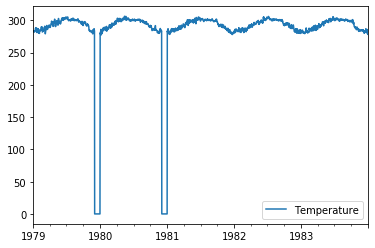

In [46]:
df.plot()

In [47]:
newdf = df

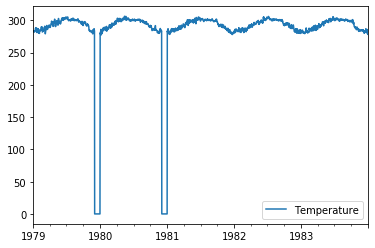

In [49]:
newdf.plot()

In [53]:
newdf['Temperature'][0]

282.6611022949219

In [55]:
kdf = newdf.replace(to_replace = 0 , value = 282)
kdf.plot()

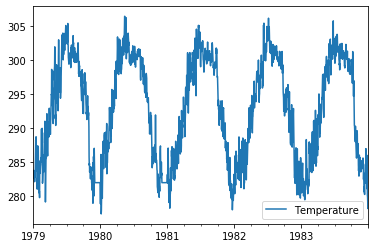

In [56]:
kdf.plot()

First, we have to convert the temperature values to Degree celsius

In [80]:
def conv_to_celsius(x):
    return x - 273.15


In [81]:
celsiusDf = kdf['Temperature'].apply(conv_to_celsius)
celsiusDf.to_csv('Delhi_Temp_1979_1983.csv')
celsiusDf.plot()

NameError: name 'kdf' is not defined

Now, we have to load the monthly average data of these years and then subtract the average values to get the anomalies for each day

In [62]:
year_start = min(all_years)
year_end = max(all_years)
print(year_start)
print(year_end)
date_range = pd.date_range(start = year_start + '-01-01', end=year_end + '-12-31', freq='M' )
df_avg = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)
df_avg

1979
1983


In [63]:
df_avg

Temperature
1979-01-31          0.0
1979-02-28          0.0
1979-03-31          0.0
1979-04-30          0.0
1979-05-31          0.0
1979-06-30          0.0
1979-07-31          0.0
1979-08-31          0.0
1979-09-30          0.0
1979-10-31          0.0
1979-11-30          0.0
1979-12-31          0.0
1980-01-31          0.0
1980-02-29          0.0
1980-03-31          0.0
1980-04-30          0.0
1980-05-31          0.0
1980-06-30          0.0
1980-07-31          0.0
1980-08-31          0.0
1980-09-30          0.0
1980-10-31          0.0
1980-11-30          0.0
1980-12-31          0.0
1981-01-31          0.0
1981-02-28          0.0
1981-03-31          0.0
1981-04-30          0.0
1981-05-31          0.0
1981-06-30          0.0
1981-07-31          0.0
1981-08-31          0.0
1981-09-30          0.0
1981-10-31          0.0
1981-11-30          0.0
1981-12-31          0.0
1982-01-31          0.0
1982-02-28          0.0
1982-03-31          0.0
1982-04-30          0.0
1982-05-31          0.0
1982-06-30          0.0
1982-07-31          0.0
1982-08-31          0.0
1982-09-30          0.0
1982-10-31          0.0
1982-11-30          0.0
1982-12-31          0.0
1983-01-31          0.0
1983-02-28          0.0
1983-03-31          0.0
1983-04-30          0.0
1983-05-31          0.0
1983-06-30          0.0
1983-07-31          0.0
1983-08-31          0.0
1983-09-30          0.0
1983-10-31          0.0
1983-11-30          0.0
1983-12-31          0.0

In [64]:
data = Dataset('Dataset_Raw/All years Avg month/ncum_imdaa_reanl_MH_TMP-2m_1979010100-1979120100.nc')

In [68]:
data.variables['TMP_2m']

<class 'netCDF4._netCDF4.Variable'>
float32 TMP_2m(time, latitude, longitude)
    long_name: Temperature
    units: K
    _FillValue: 9.999e+20
    missing_value: 9.999e+20
    short_name: TMP_2maboveground
    level: 2 m above ground
unlimited dimensions: time
current shape = (12, 501, 751)
filling off

In [69]:
data.variables['TMP_2m'].shape[0]

12

In [70]:
for yr in all_years:
    # reading in the data
    data = Dataset('Dataset_Raw/All years Avg month/ncum_imdaa_reanl_MH_TMP-2m_' + yr +'010100-'+yr+ '120100.nc', 'r')
    
    # store the latitude and longitude data from the dataset
    latitude = data.variables['latitude'][:]
    longitude = data.variables['longitude'][:]
    
    #squared difference between the specified latitude and longitude 
    sq_diff_lat = (latitude - lat)**2
    sq_diff_lon = (longitude - lon)**2
    
    #identify the index of hte minimum  value for lat and lon
    min_index_lat  = sq_diff_lat.argmin()
    min_index_lon  = sq_diff_lon.argmin()
    
    # accessing the temperature data
    temp = data.variables['TMP_2m']
    
    # creating the date range for each year
    start = str(yr) + '-01-01'
    end = str(yr) + '-12-31'
    d_range = pd.date_range(start=start, end = end , freq='M')
    length = data.variables['TMP_2m'].shape[0]
    for t_index in np.arange(length):
        print('Recording the value for :'+str(d_range[t_index]))
        df_avg.loc[d_range[t_index]]['Temperature'] = temp[t_index , min_index_lat, min_index_lon]

Recording the value for :1979-01-31 00:00:00
Recording the value for :1979-02-28 00:00:00
Recording the value for :1979-03-31 00:00:00
Recording the value for :1979-04-30 00:00:00
Recording the value for :1979-05-31 00:00:00
Recording the value for :1979-06-30 00:00:00
Recording the value for :1979-07-31 00:00:00
Recording the value for :1979-08-31 00:00:00
Recording the value for :1979-09-30 00:00:00
Recording the value for :1979-10-31 00:00:00
Recording the value for :1979-11-30 00:00:00
Recording the value for :1979-12-31 00:00:00
Recording the value for :1980-01-31 00:00:00
Recording the value for :1980-02-29 00:00:00
Recording the value for :1980-03-31 00:00:00
Recording the value for :1980-04-30 00:00:00
Recording the value for :1980-05-31 00:00:00
Recording the value for :1980-06-30 00:00:00
Recording the value for :1980-07-31 00:00:00
Recording the value for :1980-08-31 00:00:00
Recording the value for :1980-09-30 00:00:00
Recording the value for :1980-10-31 00:00:00
Recording 

In [71]:
df_avg

Temperature
1979-01-31   284.187622
1979-02-28   284.690887
1979-03-31   287.660339
1979-04-30   294.553619
1979-05-31   295.995209
1979-06-30   301.839355
1979-07-31   301.551331
1979-08-31   300.897278
1979-09-30   297.467407
1979-10-31   294.149170
1979-11-30   290.186096
1979-12-31   283.180298
1980-01-31   280.611206
1980-02-29   284.594543
1980-03-31   288.771851
1980-04-30   294.900024
1980-05-31   300.057678
1980-06-30   302.776611
1980-07-31   300.778351
1980-08-31   300.621338
1980-09-30   298.674316
1980-10-31   293.771484
1980-11-30   286.931396
1980-12-31   283.166840
1981-01-31   283.166016
1981-02-28   285.388702
1981-03-31   289.193176
1981-04-30   294.512878
1981-05-31   299.370605
1981-06-30   301.659790
1981-07-31   300.753418
1981-08-31   300.447723
1981-09-30   299.863770
1981-10-31   292.396973
1981-11-30   287.899292
1981-12-31   281.112518
1982-01-31   284.049988
1982-02-28   284.822571
1982-03-31   288.269897
1982-04-30   292.966125
1982-05-31   297.313843
1982-06-30   301.113617
1982-07-31   302.348999
1982-08-31   300.846588
1982-09-30   298.532166
1982-10-31   293.535370
1982-11-30   287.739746
1982-12-31   283.054138
1983-01-31   282.436707
1983-02-28   283.876038
1983-03-31   287.892212
1983-04-30   292.663330
1983-05-31   297.694733
1983-06-30   301.486359
1983-07-31   301.276093
1983-08-31   300.764801
1983-09-30   299.626678
1983-10-31   292.982391
1983-11-30   285.191223
1983-12-31   282.549316

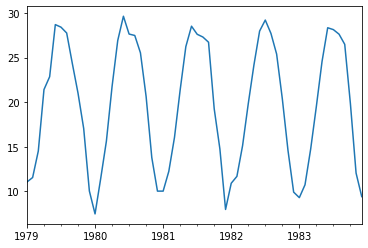

In [75]:
celsiusAvgDf = df_avg['Temperature'].apply(conv_to_celsius)
celsiusAvgDf.plot()

Now, we have to create the anomalous time series

In [144]:
celDF = pd.DataFrame(celsiusDf)
celDFavg = pd.DataFrame(celsiusAvgDf)
date_range = pd.date_range(start = year_start + '-01-01', end=year_end + '-12-31', freq='D' )
df_allavg = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)

In [14]:
def to_string(x):
    if x < 10:
        k = '0' + str(x)
        return k
    else:
        k = str(x)
        return k

In [152]:
k = 0
for yr in range(1979, 1984):
    for month in range(1,13):
        val = celDFavg['Temperature'][k]
        k = k + 1
        # fill all the values of this yr and month in df_allavg as val
        for day in range(1,32):
            date = str(yr) + '-' + to_string(month) + '-'+to_string(day)
            correctDate = None
            try:
                newDate = datetime.datetime(yr,month,day)
                correctDate = True
            except ValueError:
                correctDate = False
            if correctDate:
                df_allavg['Temperature'][date] = val

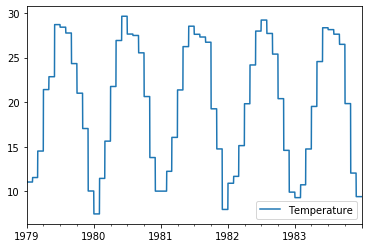

In [136]:
df_allavg.plot()

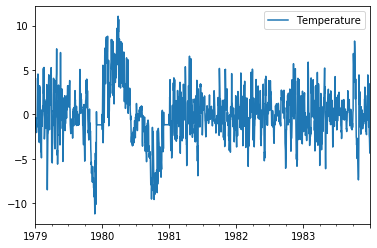

In [154]:
anomaly = celDF - df_allavg
anomaly.plot()

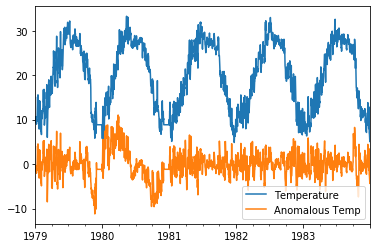

In [157]:
ax = celDF.plot()
anomaly.plot(ax=ax)

In [156]:
anomaly.rename(columns = {'Temperature':'Anomalous Temp'}, inplace = True)

In [158]:
anomaly.to_csv('Delhi_Temp_1979_1983_anomaly.csv')

In [4]:
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import seaborn as sns


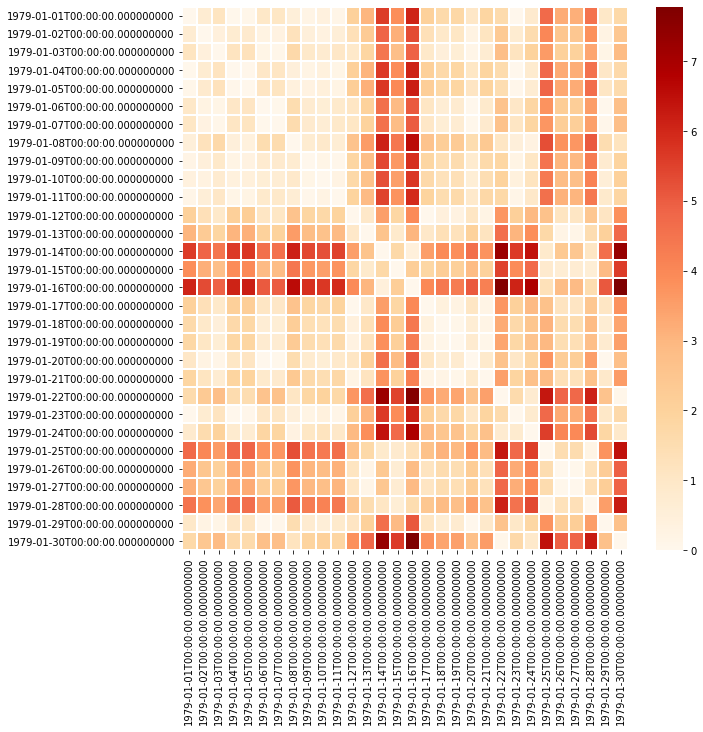

In [167]:

dist = pd.DataFrame(distance_matrix(anomaly[0:30].values, anomaly[0:30].values), index=anomaly[0:30].index, columns=anomaly[0:30].index)
plt.figure(figsize=(10,10))
sns.heatmap(
    dist,
    cmap='OrRd',linewidth=1)

In [168]:
dist = pd.DataFrame(distance_matrix(anomaly.values, anomaly.values), index=anomaly.index, columns=anomaly.index)


In [170]:
dist

1979-01-01  1979-01-02  1979-01-03  1979-01-04  1979-01-05  \
1979-01-01    0.000000    0.724884    1.151489    0.031464    0.106415   
1979-01-02    0.724884    0.000000    0.426605    0.756348    0.831299   
1979-01-03    1.151489    0.426605    0.000000    1.182953    1.257904   
1979-01-04    0.031464    0.756348    1.182953    0.000000    0.074951   
1979-01-05    0.106415    0.831299    1.257904    0.074951    0.000000   
...                ...         ...         ...         ...         ...   
1983-12-27    0.877197    1.602081    2.028687    0.845734    0.770782   
1983-12-28    1.102905    1.827789    2.254395    1.071442    0.996490   
1983-12-29    2.102234    2.827118    3.253723    2.070770    1.995819   
1983-12-30    2.834229    3.559113    3.985718    2.802765    2.727814   
1983-12-31    1.676849    2.401733    2.828339    1.645386    1.570435   

            1979-01-06  1979-01-07  1979-01-08  1979-01-09  1979-01-10  ...  \
1979-01-01    0.998749    1.041595    0.523529    0.211090    0.374786  ...   
1979-01-02    0.273865    0.316711    1.248413    0.513794    0.350098  ...   
1979-01-03    0.152740    0.109894    1.675018    0.940399    0.776703  ...   
1979-01-04    1.030212    1.073059    0.492065    0.242554    0.406250  ...   
1979-01-05    1.105164    1.148010    0.417114    0.317505    0.481201  ...   
...                ...         ...         ...         ...         ...  ...   
1983-12-27    1.875946    1.918793    0.353668    1.088287    1.251984  ...   
1983-12-28    2.101654    2.144501    0.579376    1.313995    1.477692  ...   
1983-12-29    3.100983    3.143829    1.578705    2.313324    2.477020  ...   
1983-12-30    3.832977    3.875824    2.310699    3.045319    3.209015  ...   
1983-12-31    2.675598    2.718445    1.153320    1.887939    2.051636  ...   

            1983-12-22  1983-12-23  1983-12-24  1983-12-25  1983-12-26  \
1979-01-01    0.910004    1.204254    0.100464    4.987518    2.173920   
1979-01-02    0.185120    0.479370    0.624420    4.262634    1.449036   
1979-01-03    0.241486    0.052765    1.051025    3.836029    1.022430   
1979-01-04    0.941467    1.235718    0.131927    5.018982    2.205383   
1979-01-05    1.016418    1.310669    0.206879    5.093933    2.280334   
...                ...         ...         ...         ...         ...   
1983-12-27    1.787201    2.081451    0.977661    5.864716    3.051117   
1983-12-28    2.012909    2.307159    1.203369    6.090424    3.276825   
1983-12-29    3.012238    3.306488    2.202698    7.089752    4.276154   
1983-12-30    3.744232    4.038483    2.934692    7.821747    5.008148   
1983-12-31    2.586853    2.881104    1.777313    6.664368    3.850769   

            1983-12-27  1983-12-28  1983-12-29  1983-12-30  1983-12-31  
1979-01-01    0.877197    1.102905    2.102234    2.834229    1.676849  
1979-01-02    1.602081    1.827789    2.827118    3.559113    2.401733  
1979-01-03    2.028687    2.254395    3.253723    3.985718    2.828339  
1979-01-04    0.845734    1.071442    2.070770    2.802765    1.645386  
1979-01-05    0.770782    0.996490    1.995819    2.727814    1.570435  
...                ...         ...         ...         ...         ...  
1983-12-27    0.000000    0.225708    1.225037    1.957031    0.799652  
1983-12-28    0.225708    0.000000    0.999329    1.731323    0.573944  
1983-12-29    1.225037    0.999329    0.000000    0.731995    0.425385  
1983-12-30    1.957031    1.731323    0.731995    0.000000    1.157379  
1983-12-31    0.799652    0.573944    0.425385    1.157379    0.000000  

[1826 rows x 1826 columns]

In [179]:
X = np.array(anomaly['Anomalous Temp'])
absX = X - np.min(X)

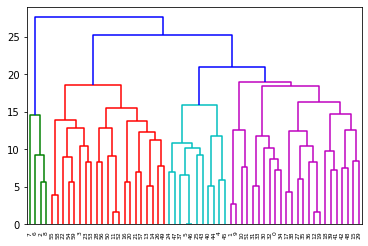

In [182]:
dendrogram = sch.dendrogram(sch.linkage(absX[0:1770],method='ward'))

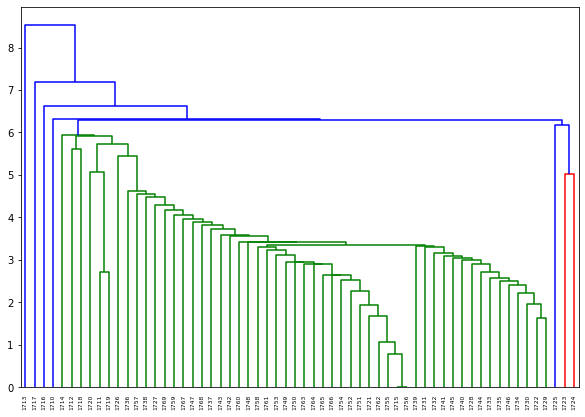

In [183]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(absX[0:1770], 'single')

labelList = range(1, 1770)

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top',labels=labelList, distance_sort='descending')
plt.show()


In [184]:
Dt = np.zeros(3540).reshape(1770, 2)
for i in range(1770):
    Dt[i][0] = i + 1
    Dt[i][1] = X[i]

In [185]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)

array([6, 6, 6, ..., 7, 7, 7])

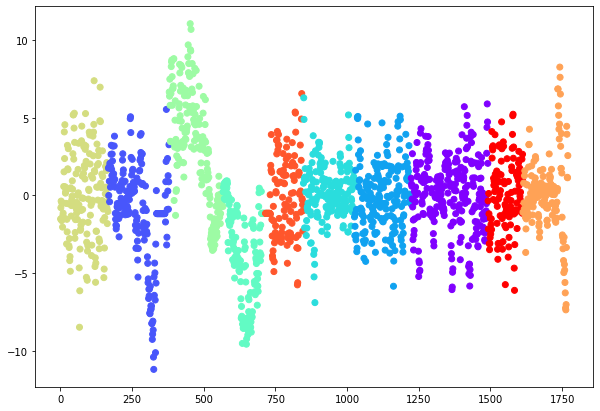

In [186]:
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')

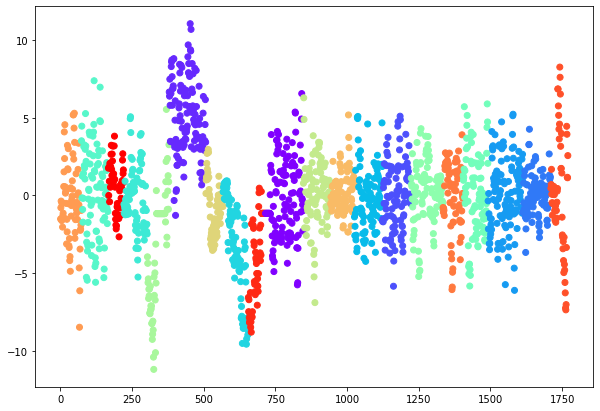

In [187]:
cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')

### This was done for Delhi from the dates 1979 to 1983. Now, we have to look at other dates

For 1984-1988


In [188]:
all_years = []
for file in glob.glob('Dataset_Raw/84-88/*.nc'):
    print(file[18:22] +" -> This is the year")
    data = Dataset(file, 'r')
    #print(data)
    time = data.variables['time']
    print(time)
    year = file[18:22]
    all_years.append(year)

1985 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (365,)
filling off
1986 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (365,)
filling off
1988 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (366,)
filling off
1987 -> This is the ye

In [189]:
year_start = min(all_years)
year_end = max(all_years)
print(year_start)
print(year_end)

1984
1988


In [190]:
date_range = pd.date_range(start = year_start + '-01-01', end=year_end + '-12-31', freq='D' )
df = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)

In [191]:
all_years.sort()

In [192]:
all_years

['1984', '1985', '1986', '1987', '1988']

In [193]:
for yr in all_years:
    # reading in the data
    data = Dataset('Dataset_Raw/84-88/' + yr + '.nc', 'r')
    
    # store the latitude and longitude data from the dataset
    latitude = data.variables['latitude'][:]
    longitude = data.variables['longitude'][:]
    
    #squared difference between the specified latitude and longitude 
    sq_diff_lat = (latitude - lat)**2
    sq_diff_lon = (longitude - lon)**2
    
    #identify the index of hte minimum  value for lat and lon
    min_index_lat  = sq_diff_lat.argmin()
    min_index_lon  = sq_diff_lon.argmin()
    
    # accessing the temperature data
    temp = data.variables['TMP_2m']
    
    # creating the date range for each year
    start = str(yr) + '-01-01'
    end = str(yr) + '-12-31'
    d_range = pd.date_range(start=start, end = end , freq='D')
    length = data.variables['TMP_2m'].shape[0]
    for t_index in np.arange(length):
        print('Recording the value for :'+str(d_range[t_index]))
        df.loc[d_range[t_index]]['Temperature'] = temp[t_index , min_index_lat, min_index_lon]

Recording the value for :1984-01-01 00:00:00
Recording the value for :1984-01-02 00:00:00
Recording the value for :1984-01-03 00:00:00
Recording the value for :1984-01-04 00:00:00
Recording the value for :1984-01-05 00:00:00
Recording the value for :1984-01-06 00:00:00
Recording the value for :1984-01-07 00:00:00
Recording the value for :1984-01-08 00:00:00
Recording the value for :1984-01-09 00:00:00
Recording the value for :1984-01-10 00:00:00
Recording the value for :1984-01-11 00:00:00
Recording the value for :1984-01-12 00:00:00
Recording the value for :1984-01-13 00:00:00
Recording the value for :1984-01-14 00:00:00
Recording the value for :1984-01-15 00:00:00
Recording the value for :1984-01-16 00:00:00
Recording the value for :1984-01-17 00:00:00
Recording the value for :1984-01-18 00:00:00
Recording the value for :1984-01-19 00:00:00
Recording the value for :1984-01-20 00:00:00
Recording the value for :1984-01-21 00:00:00
Recording the value for :1984-01-22 00:00:00
Recording 

Recording the value for :1984-07-08 00:00:00
Recording the value for :1984-07-09 00:00:00
Recording the value for :1984-07-10 00:00:00
Recording the value for :1984-07-11 00:00:00
Recording the value for :1984-07-12 00:00:00
Recording the value for :1984-07-13 00:00:00
Recording the value for :1984-07-14 00:00:00
Recording the value for :1984-07-15 00:00:00
Recording the value for :1984-07-16 00:00:00
Recording the value for :1984-07-17 00:00:00
Recording the value for :1984-07-18 00:00:00
Recording the value for :1984-07-19 00:00:00
Recording the value for :1984-07-20 00:00:00
Recording the value for :1984-07-21 00:00:00
Recording the value for :1984-07-22 00:00:00
Recording the value for :1984-07-23 00:00:00
Recording the value for :1984-07-24 00:00:00
Recording the value for :1984-07-25 00:00:00
Recording the value for :1984-07-26 00:00:00
Recording the value for :1984-07-27 00:00:00
Recording the value for :1984-07-28 00:00:00
Recording the value for :1984-07-29 00:00:00
Recording 

Recording the value for :1985-01-13 00:00:00
Recording the value for :1985-01-14 00:00:00
Recording the value for :1985-01-15 00:00:00
Recording the value for :1985-01-16 00:00:00
Recording the value for :1985-01-17 00:00:00
Recording the value for :1985-01-18 00:00:00
Recording the value for :1985-01-19 00:00:00
Recording the value for :1985-01-20 00:00:00
Recording the value for :1985-01-21 00:00:00
Recording the value for :1985-01-22 00:00:00
Recording the value for :1985-01-23 00:00:00
Recording the value for :1985-01-24 00:00:00
Recording the value for :1985-01-25 00:00:00
Recording the value for :1985-01-26 00:00:00
Recording the value for :1985-01-27 00:00:00
Recording the value for :1985-01-28 00:00:00
Recording the value for :1985-01-29 00:00:00
Recording the value for :1985-01-30 00:00:00
Recording the value for :1985-01-31 00:00:00
Recording the value for :1985-02-01 00:00:00
Recording the value for :1985-02-02 00:00:00
Recording the value for :1985-02-03 00:00:00
Recording 

Recording the value for :1985-07-27 00:00:00
Recording the value for :1985-07-28 00:00:00
Recording the value for :1985-07-29 00:00:00
Recording the value for :1985-07-30 00:00:00
Recording the value for :1985-07-31 00:00:00
Recording the value for :1985-08-01 00:00:00
Recording the value for :1985-08-02 00:00:00
Recording the value for :1985-08-03 00:00:00
Recording the value for :1985-08-04 00:00:00
Recording the value for :1985-08-05 00:00:00
Recording the value for :1985-08-06 00:00:00
Recording the value for :1985-08-07 00:00:00
Recording the value for :1985-08-08 00:00:00
Recording the value for :1985-08-09 00:00:00
Recording the value for :1985-08-10 00:00:00
Recording the value for :1985-08-11 00:00:00
Recording the value for :1985-08-12 00:00:00
Recording the value for :1985-08-13 00:00:00
Recording the value for :1985-08-14 00:00:00
Recording the value for :1985-08-15 00:00:00
Recording the value for :1985-08-16 00:00:00
Recording the value for :1985-08-17 00:00:00
Recording 

Recording the value for :1986-02-10 00:00:00
Recording the value for :1986-02-11 00:00:00
Recording the value for :1986-02-12 00:00:00
Recording the value for :1986-02-13 00:00:00
Recording the value for :1986-02-14 00:00:00
Recording the value for :1986-02-15 00:00:00
Recording the value for :1986-02-16 00:00:00
Recording the value for :1986-02-17 00:00:00
Recording the value for :1986-02-18 00:00:00
Recording the value for :1986-02-19 00:00:00
Recording the value for :1986-02-20 00:00:00
Recording the value for :1986-02-21 00:00:00
Recording the value for :1986-02-22 00:00:00
Recording the value for :1986-02-23 00:00:00
Recording the value for :1986-02-24 00:00:00
Recording the value for :1986-02-25 00:00:00
Recording the value for :1986-02-26 00:00:00
Recording the value for :1986-02-27 00:00:00
Recording the value for :1986-02-28 00:00:00
Recording the value for :1986-03-01 00:00:00
Recording the value for :1986-03-02 00:00:00
Recording the value for :1986-03-03 00:00:00
Recording 

Recording the value for :1986-08-13 00:00:00
Recording the value for :1986-08-14 00:00:00
Recording the value for :1986-08-15 00:00:00
Recording the value for :1986-08-16 00:00:00
Recording the value for :1986-08-17 00:00:00
Recording the value for :1986-08-18 00:00:00
Recording the value for :1986-08-19 00:00:00
Recording the value for :1986-08-20 00:00:00
Recording the value for :1986-08-21 00:00:00
Recording the value for :1986-08-22 00:00:00
Recording the value for :1986-08-23 00:00:00
Recording the value for :1986-08-24 00:00:00
Recording the value for :1986-08-25 00:00:00
Recording the value for :1986-08-26 00:00:00
Recording the value for :1986-08-27 00:00:00
Recording the value for :1986-08-28 00:00:00
Recording the value for :1986-08-29 00:00:00
Recording the value for :1986-08-30 00:00:00
Recording the value for :1986-08-31 00:00:00
Recording the value for :1986-09-01 00:00:00
Recording the value for :1986-09-02 00:00:00
Recording the value for :1986-09-03 00:00:00
Recording 

Recording the value for :1987-02-18 00:00:00
Recording the value for :1987-02-19 00:00:00
Recording the value for :1987-02-20 00:00:00
Recording the value for :1987-02-21 00:00:00
Recording the value for :1987-02-22 00:00:00
Recording the value for :1987-02-23 00:00:00
Recording the value for :1987-02-24 00:00:00
Recording the value for :1987-02-25 00:00:00
Recording the value for :1987-02-26 00:00:00
Recording the value for :1987-02-27 00:00:00
Recording the value for :1987-02-28 00:00:00
Recording the value for :1987-03-01 00:00:00
Recording the value for :1987-03-02 00:00:00
Recording the value for :1987-03-03 00:00:00
Recording the value for :1987-03-04 00:00:00
Recording the value for :1987-03-05 00:00:00
Recording the value for :1987-03-06 00:00:00
Recording the value for :1987-03-07 00:00:00
Recording the value for :1987-03-08 00:00:00
Recording the value for :1987-03-09 00:00:00
Recording the value for :1987-03-10 00:00:00
Recording the value for :1987-03-11 00:00:00
Recording 

Recording the value for :1987-08-29 00:00:00
Recording the value for :1987-08-30 00:00:00
Recording the value for :1987-08-31 00:00:00
Recording the value for :1987-09-01 00:00:00
Recording the value for :1987-09-02 00:00:00
Recording the value for :1987-09-03 00:00:00
Recording the value for :1987-09-04 00:00:00
Recording the value for :1987-09-05 00:00:00
Recording the value for :1987-09-06 00:00:00
Recording the value for :1987-09-07 00:00:00
Recording the value for :1987-09-08 00:00:00
Recording the value for :1987-09-09 00:00:00
Recording the value for :1987-09-10 00:00:00
Recording the value for :1987-09-11 00:00:00
Recording the value for :1987-09-12 00:00:00
Recording the value for :1987-09-13 00:00:00
Recording the value for :1987-09-14 00:00:00
Recording the value for :1987-09-15 00:00:00
Recording the value for :1987-09-16 00:00:00
Recording the value for :1987-09-17 00:00:00
Recording the value for :1987-09-18 00:00:00
Recording the value for :1987-09-19 00:00:00
Recording 

Recording the value for :1988-03-22 00:00:00
Recording the value for :1988-03-23 00:00:00
Recording the value for :1988-03-24 00:00:00
Recording the value for :1988-03-25 00:00:00
Recording the value for :1988-03-26 00:00:00
Recording the value for :1988-03-27 00:00:00
Recording the value for :1988-03-28 00:00:00
Recording the value for :1988-03-29 00:00:00
Recording the value for :1988-03-30 00:00:00
Recording the value for :1988-03-31 00:00:00
Recording the value for :1988-04-01 00:00:00
Recording the value for :1988-04-02 00:00:00
Recording the value for :1988-04-03 00:00:00
Recording the value for :1988-04-04 00:00:00
Recording the value for :1988-04-05 00:00:00
Recording the value for :1988-04-06 00:00:00
Recording the value for :1988-04-07 00:00:00
Recording the value for :1988-04-08 00:00:00
Recording the value for :1988-04-09 00:00:00
Recording the value for :1988-04-10 00:00:00
Recording the value for :1988-04-11 00:00:00
Recording the value for :1988-04-12 00:00:00
Recording 

Recording the value for :1988-09-26 00:00:00
Recording the value for :1988-09-27 00:00:00
Recording the value for :1988-09-28 00:00:00
Recording the value for :1988-09-29 00:00:00
Recording the value for :1988-09-30 00:00:00
Recording the value for :1988-10-01 00:00:00
Recording the value for :1988-10-02 00:00:00
Recording the value for :1988-10-03 00:00:00
Recording the value for :1988-10-04 00:00:00
Recording the value for :1988-10-05 00:00:00
Recording the value for :1988-10-06 00:00:00
Recording the value for :1988-10-07 00:00:00
Recording the value for :1988-10-08 00:00:00
Recording the value for :1988-10-09 00:00:00
Recording the value for :1988-10-10 00:00:00
Recording the value for :1988-10-11 00:00:00
Recording the value for :1988-10-12 00:00:00
Recording the value for :1988-10-13 00:00:00
Recording the value for :1988-10-14 00:00:00
Recording the value for :1988-10-15 00:00:00
Recording the value for :1988-10-16 00:00:00
Recording the value for :1988-10-17 00:00:00
Recording 

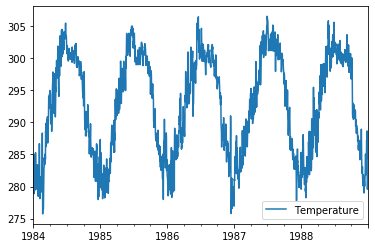

In [194]:
df.plot()

In [195]:
celsiusDf = df['Temperature'].apply(conv_to_celsius)

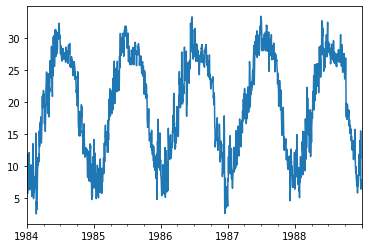

In [198]:
celsiusDf.to_csv('Delhi_Temp_1984_1988.csv')
celsiusDf.plot()

In [199]:
year_start = min(all_years)
year_end = max(all_years)
print(year_start)
print(year_end)
date_range = pd.date_range(start = year_start + '-01-01', end=year_end + '-12-31', freq='M' )
df_avg = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)

1984
1988


In [200]:
all_years

['1984', '1985', '1986', '1987', '1988']

In [201]:
for yr in all_years:
    # reading in the data
    data = Dataset('Dataset_Raw/All years Avg month/ncum_imdaa_reanl_MH_TMP-2m_' + yr +'010100-'+yr+ '120100.nc', 'r')
    
    # store the latitude and longitude data from the dataset
    latitude = data.variables['latitude'][:]
    longitude = data.variables['longitude'][:]
    
    #squared difference between the specified latitude and longitude 
    sq_diff_lat = (latitude - lat)**2
    sq_diff_lon = (longitude - lon)**2
    
    #identify the index of hte minimum  value for lat and lon
    min_index_lat  = sq_diff_lat.argmin()
    min_index_lon  = sq_diff_lon.argmin()
    
    # accessing the temperature data
    temp = data.variables['TMP_2m']
    
    # creating the date range for each year
    start = str(yr) + '-01-01'
    end = str(yr) + '-12-31'
    d_range = pd.date_range(start=start, end = end , freq='M')
    length = data.variables['TMP_2m'].shape[0]
    for t_index in np.arange(length):
        print('Recording the value for :'+str(d_range[t_index]))
        df_avg.loc[d_range[t_index]]['Temperature'] = temp[t_index , min_index_lat, min_index_lon]

Recording the value for :1984-01-31 00:00:00
Recording the value for :1984-02-29 00:00:00
Recording the value for :1984-03-31 00:00:00
Recording the value for :1984-04-30 00:00:00
Recording the value for :1984-05-31 00:00:00
Recording the value for :1984-06-30 00:00:00
Recording the value for :1984-07-31 00:00:00
Recording the value for :1984-08-31 00:00:00
Recording the value for :1984-09-30 00:00:00
Recording the value for :1984-10-31 00:00:00
Recording the value for :1984-11-30 00:00:00
Recording the value for :1984-12-31 00:00:00
Recording the value for :1985-01-31 00:00:00
Recording the value for :1985-02-28 00:00:00
Recording the value for :1985-03-31 00:00:00
Recording the value for :1985-04-30 00:00:00
Recording the value for :1985-05-31 00:00:00
Recording the value for :1985-06-30 00:00:00
Recording the value for :1985-07-31 00:00:00
Recording the value for :1985-08-31 00:00:00
Recording the value for :1985-09-30 00:00:00
Recording the value for :1985-10-31 00:00:00
Recording 

In [202]:
celsiusAvgDf = df_avg['Temperature'].apply(conv_to_celsius)

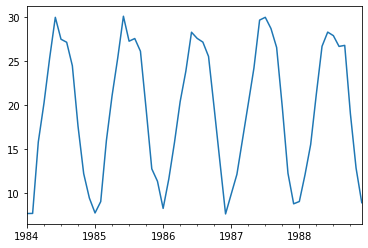

In [203]:
celsiusAvgDf.plot()

In [204]:
celDF = pd.DataFrame(celsiusDf)
celDFavg = pd.DataFrame(celsiusAvgDf)

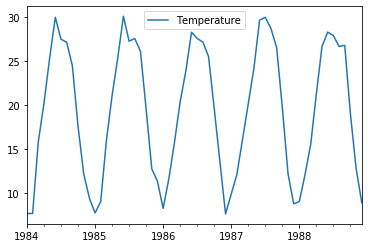

In [212]:
celDFavg.plot()

In [208]:
year_start = min(all_years)
year_end = max(all_years)
print(year_start)
print(year_end)

1984
1988


In [209]:

date_range = pd.date_range(start = year_start + '-01-01', end=year_end + '-12-31', freq='D' )
df_allavg = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)

In [216]:
k = 0
for yr in range(1984, 1989):
    for month in range(1,13):
        val = celDFavg['Temperature'][k]
        k = k + 1
        # fill all the values of this yr and month in df_allavg as val
        for day in range(1,32):
            date = str(yr) + '-' + to_string(month) + '-'+to_string(day)
            correctDate = None
            #print(date)
            try:
                newDate = datetime.datetime(yr,month,day)
                correctDate = True
            except ValueError:
                correctDate = False
            if correctDate:
                df_allavg['Temperature'][date] = val

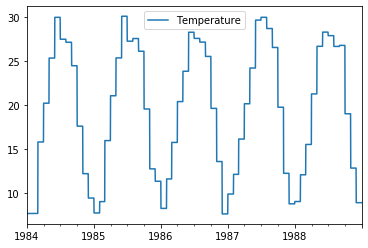

In [217]:
df_allavg.plot()

In [218]:
anomaly2 = celDF - df_allavg

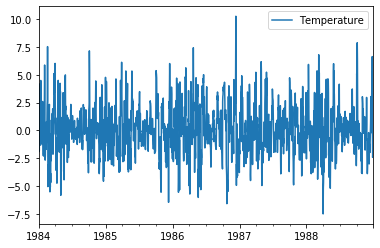

In [219]:
anomaly2.plot()

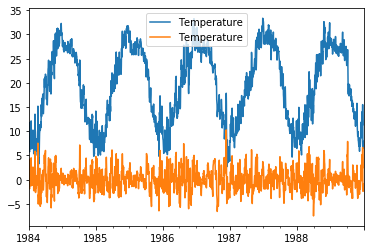

In [220]:
ax = celDF.plot()
anomaly2.plot(ax=ax)

In [221]:
anomaly2.to_csv('Delhi_Temp_1984_1988_anomaly.csv')

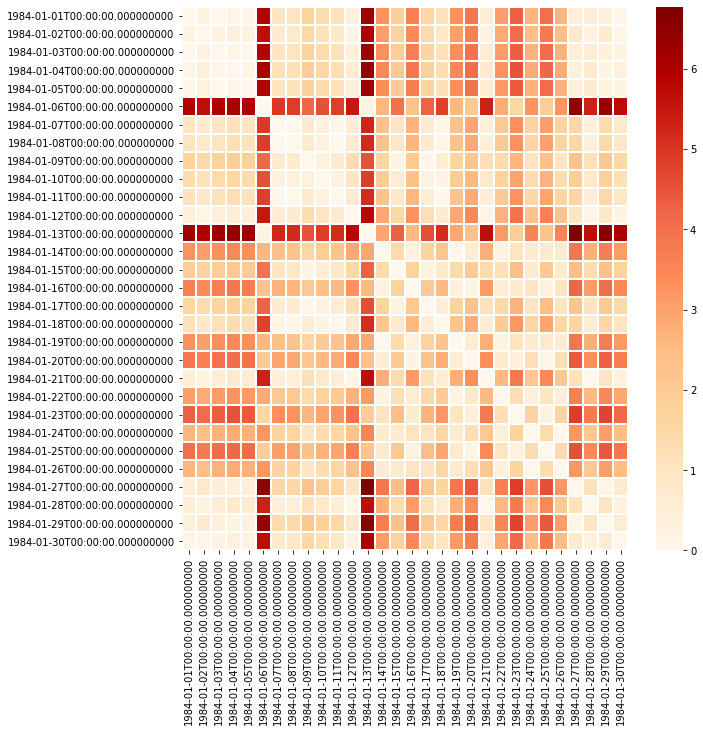

In [222]:
dist = pd.DataFrame(distance_matrix(anomaly2[0:30].values, anomaly2[0:30].values), index=anomaly2[0:30].index, columns=anomaly2[0:30].index)
plt.figure(figsize=(10,10))
sns.heatmap(
    dist,
    cmap='OrRd',linewidth=1)

In [223]:
pd.DataFrame(distance_matrix(anomaly2.values, anomaly2.values), index=anomaly2.index, columns=anomaly2.index)

1984-01-01  1984-01-02  1984-01-03  1984-01-04  1984-01-05  \
1984-01-01    0.000000    0.242340    0.029541    0.179962    0.067383   
1984-01-02    0.242340    0.000000    0.271881    0.422302    0.309723   
1984-01-03    0.029541    0.271881    0.000000    0.150421    0.037842   
1984-01-04    0.179962    0.422302    0.150421    0.000000    0.112579   
1984-01-05    0.067383    0.309723    0.037842    0.112579    0.000000   
...                ...         ...         ...         ...         ...   
1988-12-27    0.694000    0.936340    0.664459    0.514038    0.626617   
1988-12-28    0.335419    0.577759    0.305878    0.155457    0.268036   
1988-12-29    0.777679    0.535339    0.807220    0.957642    0.845062   
1988-12-30    0.160156    0.402496    0.130615    0.019806    0.092773   
1988-12-31    0.052368    0.294708    0.022827    0.127594    0.015015   

            1984-01-06  1984-01-07  1984-01-08  1984-01-09  1984-01-10  ...  \
1984-01-01    5.903046    0.980225    1.024628    1.707520    1.350342  ...   
1984-01-02    5.660706    0.737885    0.782288    1.465179    1.108002  ...   
1984-01-03    5.932587    1.009766    1.054169    1.737061    1.379883  ...   
1984-01-04    6.083008    1.160187    1.204590    1.887482    1.530304  ...   
1984-01-05    5.970428    1.047607    1.092010    1.774902    1.417725  ...   
...                ...         ...         ...         ...         ...  ...   
1988-12-27    6.597046    1.674225    1.718628    2.401520    2.044342  ...   
1988-12-28    6.238464    1.315643    1.360046    2.042938    1.685760  ...   
1988-12-29    5.125366    0.202545    0.246948    0.929840    0.572662  ...   
1988-12-30    6.063202    1.140381    1.184784    1.867676    1.510498  ...   
1988-12-31    5.955414    1.032593    1.076996    1.759888    1.402710  ...   

            1988-12-22  1988-12-23  1988-12-24  1988-12-25  1988-12-26  \
1984-01-01    5.118561    6.935242    4.054840    8.364685    1.393005   
1984-01-02    4.876221    6.692902    3.812500    8.122345    1.150665   
1984-01-03    5.148102    6.964783    4.084381    8.394226    1.422546   
1984-01-04    5.298523    7.115204    4.234802    8.544647    1.572968   
1984-01-05    5.185944    7.002625    4.122223    8.432068    1.460388   
...                ...         ...         ...         ...         ...   
1988-12-27    5.812561    7.629242    4.748840    9.058685    2.087006   
1988-12-28    5.453979    7.270660    4.390259    8.700104    1.728424   
1988-12-29    4.340881    6.157562    3.277161    7.587006    0.615326   
1988-12-30    5.278717    7.095398    4.214996    8.524841    1.553162   
1988-12-31    5.170929    6.987610    4.107208    8.417053    1.445374   

            1988-12-27  1988-12-28  1988-12-29  1988-12-30  1988-12-31  
1984-01-01    0.694000    0.335419    0.777679    0.160156    0.052368  
1984-01-02    0.936340    0.577759    0.535339    0.402496    0.294708  
1984-01-03    0.664459    0.305878    0.807220    0.130615    0.022827  
1984-01-04    0.514038    0.155457    0.957642    0.019806    0.127594  
1984-01-05    0.626617    0.268036    0.845062    0.092773    0.015015  
...                ...         ...         ...         ...         ...  
1988-12-27    0.000000    0.358582    1.471680    0.533844    0.641632  
1988-12-28    0.358582    0.000000    1.113098    0.175262    0.283051  
1988-12-29    1.471680    1.113098    0.000000    0.937836    0.830048  
1988-12-30    0.533844    0.175262    0.937836    0.000000    0.107788  
1988-12-31    0.641632    0.283051    0.830048    0.107788    0.000000  

[1827 rows x 1827 columns]

In [224]:
X = np.array(anomaly2['Temperature'])
absX = X - np.min(X)

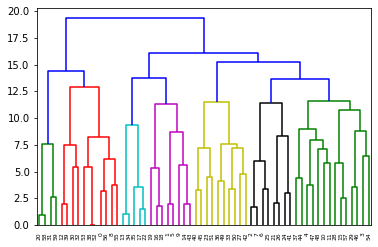

In [225]:
dendrogram = sch.dendrogram(sch.linkage(absX[0:1770],method='ward'))

In [227]:
Dt = np.zeros(3540).reshape(1770, 2)
for i in range(1770):
    Dt[i][0] = i + 1
    Dt[i][1] = X[i]

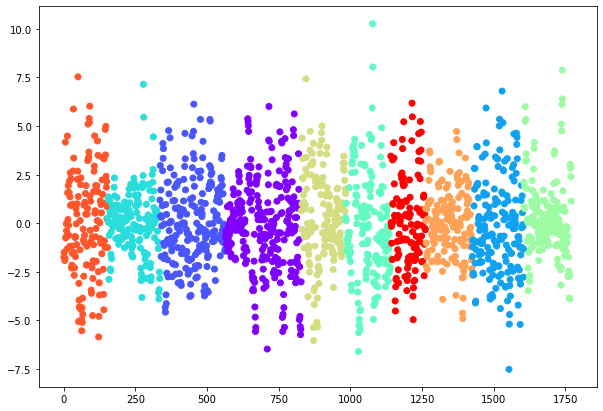

In [228]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')

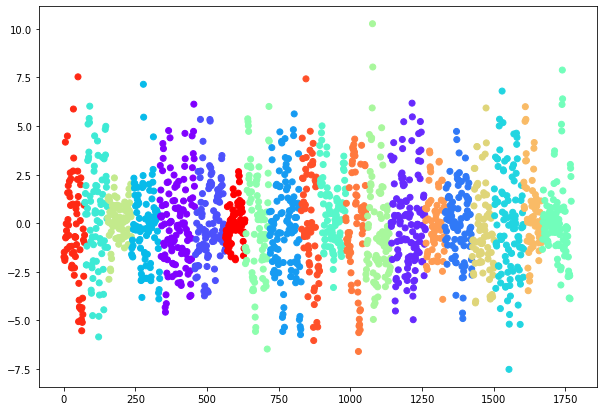

In [229]:
cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')

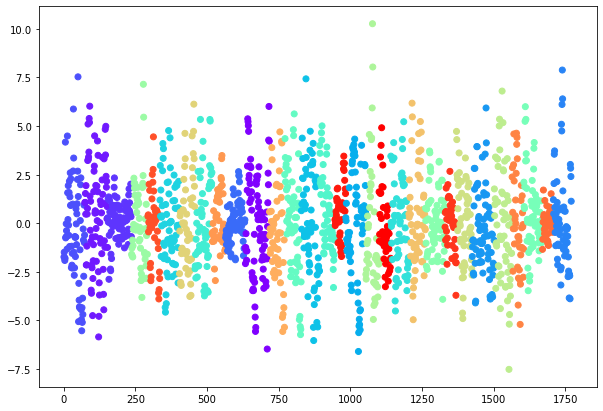

In [230]:
cluster = AgglomerativeClustering(n_clusters=30, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')

In [231]:
all_years = []
for file in glob.glob('Dataset_Raw/89-98/*.nc'):
    print(file[18:22] +" -> This is the year")
    data = Dataset(file, 'r')
    #print(data)
    time = data.variables['time']
    print(time)
    year = file[18:22]
    all_years.append(year)

1990 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (341,)
filling off
1998 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (365,)
filling off
1993 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (365,)
filling off
1997 -> This is the ye

In [232]:
year_start = min(all_years)
year_end = max(all_years)
print(year_start)
print(year_end)
date_range = pd.date_range(start = year_start + '-01-01', end=year_end + '-12-31', freq='D' )
df = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)
df

1989
1998


Temperature
1989-01-01          0.0
1989-01-02          0.0
1989-01-03          0.0
1989-01-04          0.0
1989-01-05          0.0
...                 ...
1998-12-27          0.0
1998-12-28          0.0
1998-12-29          0.0
1998-12-30          0.0
1998-12-31          0.0

[3652 rows x 1 columns]

In [233]:
all_years.sort()
for yr in all_years:
    # reading in the data
    data = Dataset('Dataset_Raw/89-98/' + yr + '.nc', 'r')
    
    # store the latitude and longitude data from the dataset
    latitude = data.variables['latitude'][:]
    longitude = data.variables['longitude'][:]
    
    #squared difference between the specified latitude and longitude 
    sq_diff_lat = (latitude - lat)**2
    sq_diff_lon = (longitude - lon)**2
    
    #identify the index of hte minimum  value for lat and lon
    min_index_lat  = sq_diff_lat.argmin()
    min_index_lon  = sq_diff_lon.argmin()
    
    # accessing the temperature data
    temp = data.variables['TMP_2m']
    
    # creating the date range for each year
    start = str(yr) + '-01-01'
    end = str(yr) + '-12-31'
    d_range = pd.date_range(start=start, end = end , freq='D')
    length = data.variables['TMP_2m'].shape[0]
    for t_index in np.arange(length):
        print('Recording the value for :'+str(d_range[t_index]))
        df.loc[d_range[t_index]]['Temperature'] = temp[t_index , min_index_lat, min_index_lon]

Recording the value for :1989-01-01 00:00:00
Recording the value for :1989-01-02 00:00:00
Recording the value for :1989-01-03 00:00:00
Recording the value for :1989-01-04 00:00:00
Recording the value for :1989-01-05 00:00:00
Recording the value for :1989-01-06 00:00:00
Recording the value for :1989-01-07 00:00:00
Recording the value for :1989-01-08 00:00:00
Recording the value for :1989-01-09 00:00:00
Recording the value for :1989-01-10 00:00:00
Recording the value for :1989-01-11 00:00:00
Recording the value for :1989-01-12 00:00:00
Recording the value for :1989-01-13 00:00:00
Recording the value for :1989-01-14 00:00:00
Recording the value for :1989-01-15 00:00:00
Recording the value for :1989-01-16 00:00:00
Recording the value for :1989-01-17 00:00:00
Recording the value for :1989-01-18 00:00:00
Recording the value for :1989-01-19 00:00:00
Recording the value for :1989-01-20 00:00:00
Recording the value for :1989-01-21 00:00:00
Recording the value for :1989-01-22 00:00:00
Recording 

Recording the value for :1989-07-03 00:00:00
Recording the value for :1989-07-04 00:00:00
Recording the value for :1989-07-05 00:00:00
Recording the value for :1989-07-06 00:00:00
Recording the value for :1989-07-07 00:00:00
Recording the value for :1989-07-08 00:00:00
Recording the value for :1989-07-09 00:00:00
Recording the value for :1989-07-10 00:00:00
Recording the value for :1989-07-11 00:00:00
Recording the value for :1989-07-12 00:00:00
Recording the value for :1989-07-13 00:00:00
Recording the value for :1989-07-14 00:00:00
Recording the value for :1989-07-15 00:00:00
Recording the value for :1989-07-16 00:00:00
Recording the value for :1989-07-17 00:00:00
Recording the value for :1989-07-18 00:00:00
Recording the value for :1989-07-19 00:00:00
Recording the value for :1989-07-20 00:00:00
Recording the value for :1989-07-21 00:00:00
Recording the value for :1989-07-22 00:00:00
Recording the value for :1989-07-23 00:00:00
Recording the value for :1989-07-24 00:00:00
Recording 

Recording the value for :1990-01-08 00:00:00
Recording the value for :1990-01-09 00:00:00
Recording the value for :1990-01-10 00:00:00
Recording the value for :1990-01-11 00:00:00
Recording the value for :1990-01-12 00:00:00
Recording the value for :1990-01-13 00:00:00
Recording the value for :1990-01-14 00:00:00
Recording the value for :1990-01-15 00:00:00
Recording the value for :1990-01-16 00:00:00
Recording the value for :1990-01-17 00:00:00
Recording the value for :1990-01-18 00:00:00
Recording the value for :1990-01-19 00:00:00
Recording the value for :1990-01-20 00:00:00
Recording the value for :1990-01-21 00:00:00
Recording the value for :1990-01-22 00:00:00
Recording the value for :1990-01-23 00:00:00
Recording the value for :1990-01-24 00:00:00
Recording the value for :1990-01-25 00:00:00
Recording the value for :1990-01-26 00:00:00
Recording the value for :1990-01-27 00:00:00
Recording the value for :1990-01-28 00:00:00
Recording the value for :1990-01-29 00:00:00
Recording 

Recording the value for :1990-07-19 00:00:00
Recording the value for :1990-07-20 00:00:00
Recording the value for :1990-07-21 00:00:00
Recording the value for :1990-07-22 00:00:00
Recording the value for :1990-07-23 00:00:00
Recording the value for :1990-07-24 00:00:00
Recording the value for :1990-07-25 00:00:00
Recording the value for :1990-07-26 00:00:00
Recording the value for :1990-07-27 00:00:00
Recording the value for :1990-07-28 00:00:00
Recording the value for :1990-07-29 00:00:00
Recording the value for :1990-07-30 00:00:00
Recording the value for :1990-07-31 00:00:00
Recording the value for :1990-08-01 00:00:00
Recording the value for :1990-08-02 00:00:00
Recording the value for :1990-08-03 00:00:00
Recording the value for :1990-08-04 00:00:00
Recording the value for :1990-08-05 00:00:00
Recording the value for :1990-08-06 00:00:00
Recording the value for :1990-08-07 00:00:00
Recording the value for :1990-08-08 00:00:00
Recording the value for :1990-08-09 00:00:00
Recording 

Recording the value for :1991-02-19 00:00:00
Recording the value for :1991-02-20 00:00:00
Recording the value for :1991-02-21 00:00:00
Recording the value for :1991-02-22 00:00:00
Recording the value for :1991-02-23 00:00:00
Recording the value for :1991-02-24 00:00:00
Recording the value for :1991-02-25 00:00:00
Recording the value for :1991-02-26 00:00:00
Recording the value for :1991-02-27 00:00:00
Recording the value for :1991-02-28 00:00:00
Recording the value for :1991-03-01 00:00:00
Recording the value for :1991-03-02 00:00:00
Recording the value for :1991-03-03 00:00:00
Recording the value for :1991-03-04 00:00:00
Recording the value for :1991-03-05 00:00:00
Recording the value for :1991-03-06 00:00:00
Recording the value for :1991-03-07 00:00:00
Recording the value for :1991-03-08 00:00:00
Recording the value for :1991-03-09 00:00:00
Recording the value for :1991-03-10 00:00:00
Recording the value for :1991-03-11 00:00:00
Recording the value for :1991-03-12 00:00:00
Recording 

Recording the value for :1991-09-07 00:00:00
Recording the value for :1991-09-08 00:00:00
Recording the value for :1991-09-09 00:00:00
Recording the value for :1991-09-10 00:00:00
Recording the value for :1991-09-11 00:00:00
Recording the value for :1991-09-12 00:00:00
Recording the value for :1991-09-13 00:00:00
Recording the value for :1991-09-14 00:00:00
Recording the value for :1991-09-15 00:00:00
Recording the value for :1991-09-16 00:00:00
Recording the value for :1991-09-17 00:00:00
Recording the value for :1991-09-18 00:00:00
Recording the value for :1991-09-19 00:00:00
Recording the value for :1991-09-20 00:00:00
Recording the value for :1991-09-21 00:00:00
Recording the value for :1991-09-22 00:00:00
Recording the value for :1991-09-23 00:00:00
Recording the value for :1991-09-24 00:00:00
Recording the value for :1991-09-25 00:00:00
Recording the value for :1991-09-26 00:00:00
Recording the value for :1991-09-27 00:00:00
Recording the value for :1991-09-28 00:00:00
Recording 

Recording the value for :1992-03-27 00:00:00
Recording the value for :1992-03-28 00:00:00
Recording the value for :1992-03-29 00:00:00
Recording the value for :1992-03-30 00:00:00
Recording the value for :1992-03-31 00:00:00
Recording the value for :1992-04-01 00:00:00
Recording the value for :1992-04-02 00:00:00
Recording the value for :1992-04-03 00:00:00
Recording the value for :1992-04-04 00:00:00
Recording the value for :1992-04-05 00:00:00
Recording the value for :1992-04-06 00:00:00
Recording the value for :1992-04-07 00:00:00
Recording the value for :1992-04-08 00:00:00
Recording the value for :1992-04-09 00:00:00
Recording the value for :1992-04-10 00:00:00
Recording the value for :1992-04-11 00:00:00
Recording the value for :1992-04-12 00:00:00
Recording the value for :1992-04-13 00:00:00
Recording the value for :1992-04-14 00:00:00
Recording the value for :1992-04-15 00:00:00
Recording the value for :1992-04-16 00:00:00
Recording the value for :1992-04-17 00:00:00
Recording 

Recording the value for :1992-10-12 00:00:00
Recording the value for :1992-10-13 00:00:00
Recording the value for :1992-10-14 00:00:00
Recording the value for :1992-10-15 00:00:00
Recording the value for :1992-10-16 00:00:00
Recording the value for :1992-10-17 00:00:00
Recording the value for :1992-10-18 00:00:00
Recording the value for :1992-10-19 00:00:00
Recording the value for :1992-10-20 00:00:00
Recording the value for :1992-10-21 00:00:00
Recording the value for :1992-10-22 00:00:00
Recording the value for :1992-10-23 00:00:00
Recording the value for :1992-10-24 00:00:00
Recording the value for :1992-10-25 00:00:00
Recording the value for :1992-10-26 00:00:00
Recording the value for :1992-10-27 00:00:00
Recording the value for :1992-10-28 00:00:00
Recording the value for :1992-10-29 00:00:00
Recording the value for :1992-10-30 00:00:00
Recording the value for :1992-10-31 00:00:00
Recording the value for :1992-11-01 00:00:00
Recording the value for :1992-11-02 00:00:00
Recording 

Recording the value for :1993-04-27 00:00:00
Recording the value for :1993-04-28 00:00:00
Recording the value for :1993-04-29 00:00:00
Recording the value for :1993-04-30 00:00:00
Recording the value for :1993-05-01 00:00:00
Recording the value for :1993-05-02 00:00:00
Recording the value for :1993-05-03 00:00:00
Recording the value for :1993-05-04 00:00:00
Recording the value for :1993-05-05 00:00:00
Recording the value for :1993-05-06 00:00:00
Recording the value for :1993-05-07 00:00:00
Recording the value for :1993-05-08 00:00:00
Recording the value for :1993-05-09 00:00:00
Recording the value for :1993-05-10 00:00:00
Recording the value for :1993-05-11 00:00:00
Recording the value for :1993-05-12 00:00:00
Recording the value for :1993-05-13 00:00:00
Recording the value for :1993-05-14 00:00:00
Recording the value for :1993-05-15 00:00:00
Recording the value for :1993-05-16 00:00:00
Recording the value for :1993-05-17 00:00:00
Recording the value for :1993-05-18 00:00:00
Recording 

Recording the value for :1993-11-01 00:00:00
Recording the value for :1993-11-02 00:00:00
Recording the value for :1993-11-03 00:00:00
Recording the value for :1993-11-04 00:00:00
Recording the value for :1993-11-05 00:00:00
Recording the value for :1993-11-06 00:00:00
Recording the value for :1993-11-07 00:00:00
Recording the value for :1993-11-08 00:00:00
Recording the value for :1993-11-09 00:00:00
Recording the value for :1993-11-10 00:00:00
Recording the value for :1993-11-11 00:00:00
Recording the value for :1993-11-12 00:00:00
Recording the value for :1993-11-13 00:00:00
Recording the value for :1993-11-14 00:00:00
Recording the value for :1993-11-15 00:00:00
Recording the value for :1993-11-16 00:00:00
Recording the value for :1993-11-17 00:00:00
Recording the value for :1993-11-18 00:00:00
Recording the value for :1993-11-19 00:00:00
Recording the value for :1993-11-20 00:00:00
Recording the value for :1993-11-21 00:00:00
Recording the value for :1993-11-22 00:00:00
Recording 

Recording the value for :1994-05-05 00:00:00
Recording the value for :1994-05-06 00:00:00
Recording the value for :1994-05-07 00:00:00
Recording the value for :1994-05-08 00:00:00
Recording the value for :1994-05-09 00:00:00
Recording the value for :1994-05-10 00:00:00
Recording the value for :1994-05-11 00:00:00
Recording the value for :1994-05-12 00:00:00
Recording the value for :1994-05-13 00:00:00
Recording the value for :1994-05-14 00:00:00
Recording the value for :1994-05-15 00:00:00
Recording the value for :1994-05-16 00:00:00
Recording the value for :1994-05-17 00:00:00
Recording the value for :1994-05-18 00:00:00
Recording the value for :1994-05-19 00:00:00
Recording the value for :1994-05-20 00:00:00
Recording the value for :1994-05-21 00:00:00
Recording the value for :1994-05-22 00:00:00
Recording the value for :1994-05-23 00:00:00
Recording the value for :1994-05-24 00:00:00
Recording the value for :1994-05-25 00:00:00
Recording the value for :1994-05-26 00:00:00
Recording 

Recording the value for :1994-11-15 00:00:00
Recording the value for :1994-11-16 00:00:00
Recording the value for :1994-11-17 00:00:00
Recording the value for :1994-11-18 00:00:00
Recording the value for :1994-11-19 00:00:00
Recording the value for :1994-11-20 00:00:00
Recording the value for :1994-11-21 00:00:00
Recording the value for :1994-11-22 00:00:00
Recording the value for :1994-11-23 00:00:00
Recording the value for :1994-11-24 00:00:00
Recording the value for :1994-11-25 00:00:00
Recording the value for :1994-11-26 00:00:00
Recording the value for :1994-11-27 00:00:00
Recording the value for :1994-11-28 00:00:00
Recording the value for :1994-11-29 00:00:00
Recording the value for :1994-11-30 00:00:00
Recording the value for :1994-12-01 00:00:00
Recording the value for :1994-12-02 00:00:00
Recording the value for :1994-12-03 00:00:00
Recording the value for :1994-12-04 00:00:00
Recording the value for :1994-12-05 00:00:00
Recording the value for :1994-12-06 00:00:00
Recording 

Recording the value for :1995-05-23 00:00:00
Recording the value for :1995-05-24 00:00:00
Recording the value for :1995-05-25 00:00:00
Recording the value for :1995-05-26 00:00:00
Recording the value for :1995-05-27 00:00:00
Recording the value for :1995-05-28 00:00:00
Recording the value for :1995-05-29 00:00:00
Recording the value for :1995-05-30 00:00:00
Recording the value for :1995-05-31 00:00:00
Recording the value for :1995-06-01 00:00:00
Recording the value for :1995-06-02 00:00:00
Recording the value for :1995-06-03 00:00:00
Recording the value for :1995-06-04 00:00:00
Recording the value for :1995-06-05 00:00:00
Recording the value for :1995-06-06 00:00:00
Recording the value for :1995-06-07 00:00:00
Recording the value for :1995-06-08 00:00:00
Recording the value for :1995-06-09 00:00:00
Recording the value for :1995-06-10 00:00:00
Recording the value for :1995-06-11 00:00:00
Recording the value for :1995-06-12 00:00:00
Recording the value for :1995-06-13 00:00:00
Recording 

Recording the value for :1995-11-25 00:00:00
Recording the value for :1995-11-26 00:00:00
Recording the value for :1995-11-27 00:00:00
Recording the value for :1995-11-28 00:00:00
Recording the value for :1995-11-29 00:00:00
Recording the value for :1995-11-30 00:00:00
Recording the value for :1995-12-01 00:00:00
Recording the value for :1995-12-02 00:00:00
Recording the value for :1995-12-03 00:00:00
Recording the value for :1995-12-04 00:00:00
Recording the value for :1995-12-05 00:00:00
Recording the value for :1995-12-06 00:00:00
Recording the value for :1995-12-07 00:00:00
Recording the value for :1995-12-08 00:00:00
Recording the value for :1995-12-09 00:00:00
Recording the value for :1995-12-10 00:00:00
Recording the value for :1995-12-11 00:00:00
Recording the value for :1995-12-12 00:00:00
Recording the value for :1995-12-13 00:00:00
Recording the value for :1995-12-14 00:00:00
Recording the value for :1995-12-15 00:00:00
Recording the value for :1995-12-16 00:00:00
Recording 

Recording the value for :1996-06-02 00:00:00
Recording the value for :1996-06-03 00:00:00
Recording the value for :1996-06-04 00:00:00
Recording the value for :1996-06-05 00:00:00
Recording the value for :1996-06-06 00:00:00
Recording the value for :1996-06-07 00:00:00
Recording the value for :1996-06-08 00:00:00
Recording the value for :1996-06-09 00:00:00
Recording the value for :1996-06-10 00:00:00
Recording the value for :1996-06-11 00:00:00
Recording the value for :1996-06-12 00:00:00
Recording the value for :1996-06-13 00:00:00
Recording the value for :1996-06-14 00:00:00
Recording the value for :1996-06-15 00:00:00
Recording the value for :1996-06-16 00:00:00
Recording the value for :1996-06-17 00:00:00
Recording the value for :1996-06-18 00:00:00
Recording the value for :1996-06-19 00:00:00
Recording the value for :1996-06-20 00:00:00
Recording the value for :1996-06-21 00:00:00
Recording the value for :1996-06-22 00:00:00
Recording the value for :1996-06-23 00:00:00
Recording 

Recording the value for :1996-12-09 00:00:00
Recording the value for :1996-12-10 00:00:00
Recording the value for :1996-12-11 00:00:00
Recording the value for :1996-12-12 00:00:00
Recording the value for :1996-12-13 00:00:00
Recording the value for :1996-12-14 00:00:00
Recording the value for :1996-12-15 00:00:00
Recording the value for :1996-12-16 00:00:00
Recording the value for :1996-12-17 00:00:00
Recording the value for :1996-12-18 00:00:00
Recording the value for :1996-12-19 00:00:00
Recording the value for :1996-12-20 00:00:00
Recording the value for :1996-12-21 00:00:00
Recording the value for :1996-12-22 00:00:00
Recording the value for :1996-12-23 00:00:00
Recording the value for :1996-12-24 00:00:00
Recording the value for :1996-12-25 00:00:00
Recording the value for :1996-12-26 00:00:00
Recording the value for :1996-12-27 00:00:00
Recording the value for :1996-12-28 00:00:00
Recording the value for :1996-12-29 00:00:00
Recording the value for :1996-12-30 00:00:00
Recording 

Recording the value for :1997-06-21 00:00:00
Recording the value for :1997-06-22 00:00:00
Recording the value for :1997-06-23 00:00:00
Recording the value for :1997-06-24 00:00:00
Recording the value for :1997-06-25 00:00:00
Recording the value for :1997-06-26 00:00:00
Recording the value for :1997-06-27 00:00:00
Recording the value for :1997-06-28 00:00:00
Recording the value for :1997-06-29 00:00:00
Recording the value for :1997-06-30 00:00:00
Recording the value for :1997-07-01 00:00:00
Recording the value for :1997-07-02 00:00:00
Recording the value for :1997-07-03 00:00:00
Recording the value for :1997-07-04 00:00:00
Recording the value for :1997-07-05 00:00:00
Recording the value for :1997-07-06 00:00:00
Recording the value for :1997-07-07 00:00:00
Recording the value for :1997-07-08 00:00:00
Recording the value for :1997-07-09 00:00:00
Recording the value for :1997-07-10 00:00:00
Recording the value for :1997-07-11 00:00:00
Recording the value for :1997-07-12 00:00:00
Recording 

Recording the value for :1998-01-02 00:00:00
Recording the value for :1998-01-03 00:00:00
Recording the value for :1998-01-04 00:00:00
Recording the value for :1998-01-05 00:00:00
Recording the value for :1998-01-06 00:00:00
Recording the value for :1998-01-07 00:00:00
Recording the value for :1998-01-08 00:00:00
Recording the value for :1998-01-09 00:00:00
Recording the value for :1998-01-10 00:00:00
Recording the value for :1998-01-11 00:00:00
Recording the value for :1998-01-12 00:00:00
Recording the value for :1998-01-13 00:00:00
Recording the value for :1998-01-14 00:00:00
Recording the value for :1998-01-15 00:00:00
Recording the value for :1998-01-16 00:00:00
Recording the value for :1998-01-17 00:00:00
Recording the value for :1998-01-18 00:00:00
Recording the value for :1998-01-19 00:00:00
Recording the value for :1998-01-20 00:00:00
Recording the value for :1998-01-21 00:00:00
Recording the value for :1998-01-22 00:00:00
Recording the value for :1998-01-23 00:00:00
Recording 

Recording the value for :1998-07-08 00:00:00
Recording the value for :1998-07-09 00:00:00
Recording the value for :1998-07-10 00:00:00
Recording the value for :1998-07-11 00:00:00
Recording the value for :1998-07-12 00:00:00
Recording the value for :1998-07-13 00:00:00
Recording the value for :1998-07-14 00:00:00
Recording the value for :1998-07-15 00:00:00
Recording the value for :1998-07-16 00:00:00
Recording the value for :1998-07-17 00:00:00
Recording the value for :1998-07-18 00:00:00
Recording the value for :1998-07-19 00:00:00
Recording the value for :1998-07-20 00:00:00
Recording the value for :1998-07-21 00:00:00
Recording the value for :1998-07-22 00:00:00
Recording the value for :1998-07-23 00:00:00
Recording the value for :1998-07-24 00:00:00
Recording the value for :1998-07-25 00:00:00
Recording the value for :1998-07-26 00:00:00
Recording the value for :1998-07-27 00:00:00
Recording the value for :1998-07-28 00:00:00
Recording the value for :1998-07-29 00:00:00
Recording 

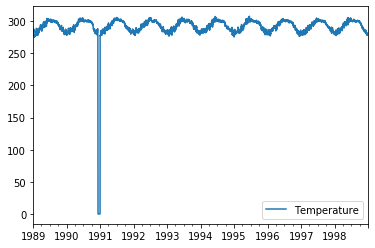

In [234]:
df.plot()

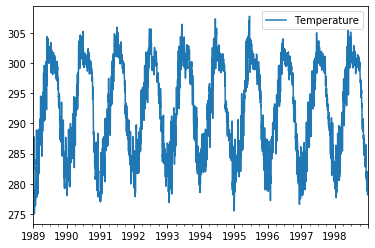

In [236]:
kdf = df.replace(to_replace = 0 , value = 282)
kdf.plot()

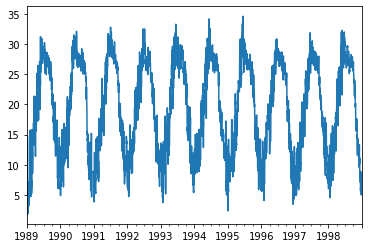

In [237]:
celsiusDf = kdf['Temperature'].apply(conv_to_celsius)
celsiusDf.to_csv('Delhi_Temp_1989_1998.csv')
celsiusDf.plot()

In [238]:
date_range = pd.date_range(start = year_start + '-01-01', end=year_end + '-12-31', freq='M' )
df_avg = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)
df_avg

Temperature
1989-01-31          0.0
1989-02-28          0.0
1989-03-31          0.0
1989-04-30          0.0
1989-05-31          0.0
...                 ...
1998-08-31          0.0
1998-09-30          0.0
1998-10-31          0.0
1998-11-30          0.0
1998-12-31          0.0

[120 rows x 1 columns]

In [239]:
all_years

['1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998']

In [240]:
for yr in all_years:
    # reading in the data
    data = Dataset('Dataset_Raw/All years Avg month/ncum_imdaa_reanl_MH_TMP-2m_' + yr +'010100-'+yr+ '120100.nc', 'r')
    
    # store the latitude and longitude data from the dataset
    latitude = data.variables['latitude'][:]
    longitude = data.variables['longitude'][:]
    
    #squared difference between the specified latitude and longitude 
    sq_diff_lat = (latitude - lat)**2
    sq_diff_lon = (longitude - lon)**2
    
    #identify the index of hte minimum  value for lat and lon
    min_index_lat  = sq_diff_lat.argmin()
    min_index_lon  = sq_diff_lon.argmin()
    
    # accessing the temperature data
    temp = data.variables['TMP_2m']
    
    # creating the date range for each year
    start = str(yr) + '-01-01'
    end = str(yr) + '-12-31'
    d_range = pd.date_range(start=start, end = end , freq='M')
    length = data.variables['TMP_2m'].shape[0]
    for t_index in np.arange(length):
        print('Recording the value for :'+str(d_range[t_index]))
        df_avg.loc[d_range[t_index]]['Temperature'] = temp[t_index , min_index_lat, min_index_lon]

Recording the value for :1989-01-31 00:00:00
Recording the value for :1989-02-28 00:00:00
Recording the value for :1989-03-31 00:00:00
Recording the value for :1989-04-30 00:00:00
Recording the value for :1989-05-31 00:00:00
Recording the value for :1989-06-30 00:00:00
Recording the value for :1989-07-31 00:00:00
Recording the value for :1989-08-31 00:00:00
Recording the value for :1989-09-30 00:00:00
Recording the value for :1989-10-31 00:00:00
Recording the value for :1989-11-30 00:00:00
Recording the value for :1989-12-31 00:00:00
Recording the value for :1990-01-31 00:00:00
Recording the value for :1990-02-28 00:00:00
Recording the value for :1990-03-31 00:00:00
Recording the value for :1990-04-30 00:00:00
Recording the value for :1990-05-31 00:00:00
Recording the value for :1990-06-30 00:00:00
Recording the value for :1990-07-31 00:00:00
Recording the value for :1990-08-31 00:00:00
Recording the value for :1990-09-30 00:00:00
Recording the value for :1990-10-31 00:00:00
Recording 

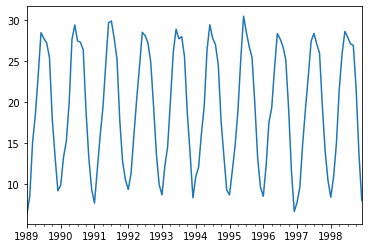

In [241]:
celsiusAvgDf = df_avg['Temperature'].apply(conv_to_celsius)
celsiusAvgDf.plot()

In [242]:
celDF = pd.DataFrame(celsiusDf)
celDFavg = pd.DataFrame(celsiusAvgDf)
date_range = pd.date_range(start = year_start + '-01-01', end=year_end + '-12-31', freq='D' )
df_allavg = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)

In [245]:
k = 0
for yr in range(1989, 1999):
    for month in range(1,13):
        val = celDFavg['Temperature'][k]
        k = k + 1
        # fill all the values of this yr and month in df_allavg as val
        for day in range(1,32):
            date = str(yr) + '-' + to_string(month) + '-'+to_string(day)
            correctDate = None
            try:
                newDate = datetime.datetime(yr,month,day)
                correctDate = True
            except ValueError:
                correctDate = False
            if correctDate:
                df_allavg['Temperature'][date] = val

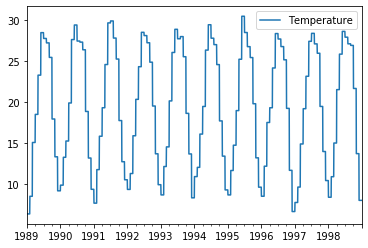

In [246]:
df_allavg.plot()

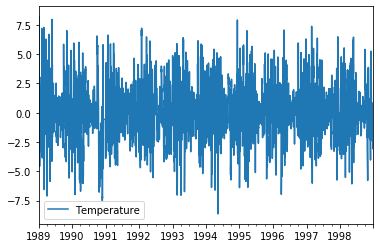

In [247]:
anomaly = celDF - df_allavg
anomaly.plot()

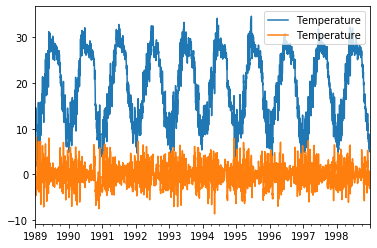

In [248]:
ax = celDF.plot()
anomaly.plot(ax=ax)
anomaly.to_csv('Delhi_Temp_1989_1998_anomaly.csv')

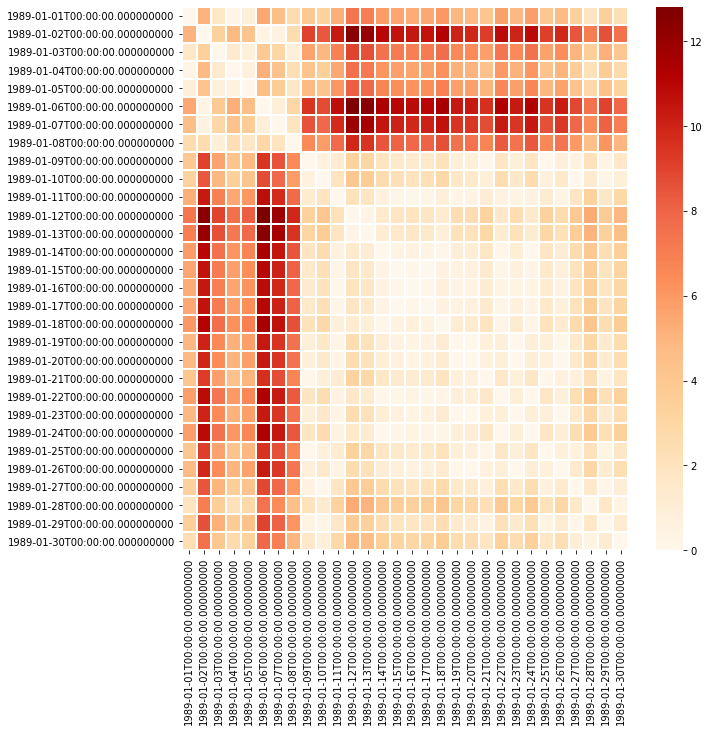

In [249]:
dist = pd.DataFrame(distance_matrix(anomaly[0:30].values, anomaly[0:30].values), index=anomaly[0:30].index, columns=anomaly[0:30].index)
plt.figure(figsize=(10,10))
sns.heatmap(
    dist,
    cmap='OrRd',linewidth=1)

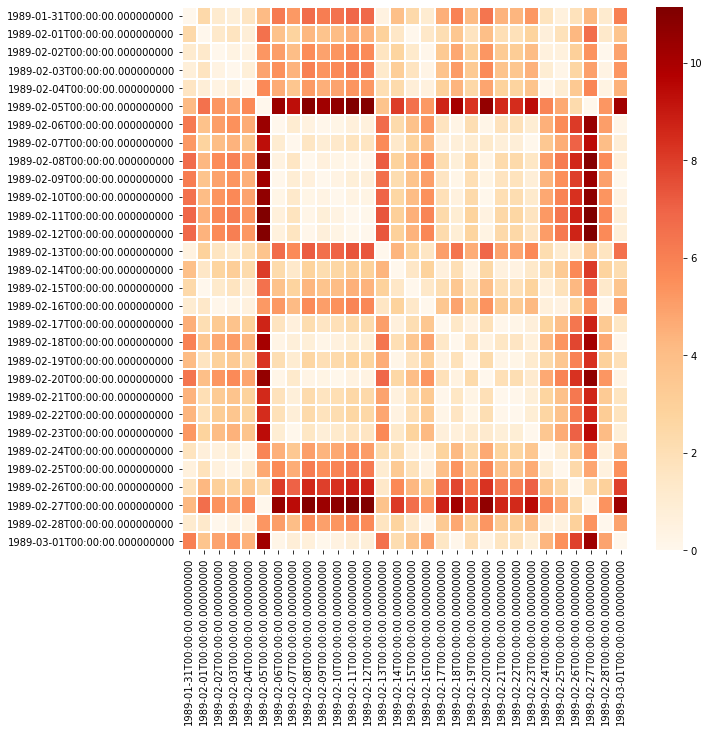

In [250]:
dist = pd.DataFrame(distance_matrix(anomaly[30:60].values, anomaly[30:60].values), index=anomaly[30:60].index, columns=anomaly[30:60].index)
plt.figure(figsize=(10,10))
sns.heatmap(
    dist,
    cmap='OrRd',linewidth=1)

In [251]:
pd.DataFrame(distance_matrix(anomaly.values, anomaly.values), index=anomaly.index, columns=anomaly.index)


1989-01-01  1989-01-02  1989-01-03  1989-01-04  1989-01-05  \
1989-01-01    0.000000    5.099304    1.647949    0.249939    0.875000   
1989-01-02    5.099304    0.000000    3.451355    4.849365    4.224304   
1989-01-03    1.647949    3.451355    0.000000    1.398010    0.772949   
1989-01-04    0.249939    4.849365    1.398010    0.000000    0.625061   
1989-01-05    0.875000    4.224304    0.772949    0.625061    0.000000   
...                ...         ...         ...         ...         ...   
1998-12-27    4.282440    9.381744    5.930389    4.532379    5.157440   
1998-12-28    4.981110   10.080414    6.629059    5.231049    5.856110   
1998-12-29    3.987946    9.087250    5.635895    4.237885    4.862946   
1998-12-30    3.435242    8.534546    5.083191    3.685181    4.310242   
1998-12-31    4.335205    9.434509    5.983154    4.585144    5.210205   

            1989-01-06  1989-01-07  1989-01-08  1989-01-09  1989-01-10  ...  \
1989-01-01    5.496887    4.575745    2.575897    3.970581    3.290955  ...   
1989-01-02    0.397583    0.523560    2.523407    9.069885    8.390259  ...   
1989-01-03    3.848938    2.927795    0.927948    5.618530    4.938904  ...   
1989-01-04    5.246948    4.325806    2.325958    4.220520    3.540894  ...   
1989-01-05    4.621887    3.700745    1.700897    4.845581    4.165955  ...   
...                ...         ...         ...         ...         ...  ...   
1998-12-27    9.779327    8.858185    6.858337    0.311859    0.991486  ...   
1998-12-28   10.477997    9.556854    7.557007    1.010529    1.690155  ...   
1998-12-29    9.484833    8.563690    6.563843    0.017365    0.696991  ...   
1998-12-30    8.932129    8.010986    6.011139    0.535339    0.144287  ...   
1998-12-31    9.832092    8.910950    6.911102    0.364624    1.044250  ...   

            1998-12-22  1998-12-23  1998-12-24  1998-12-25  1998-12-26  \
1989-01-01    2.642792    2.924835    3.885620    4.742004    5.820251   
1989-01-02    7.742096    8.024139    8.984924    9.841309   10.919556   
1989-01-03    4.290741    4.572784    5.533569    6.389954    7.468201   
1989-01-04    2.892731    3.174774    4.135559    4.991943    6.070190   
1989-01-05    3.517792    3.799835    4.760620    5.617004    6.695251   
...                ...         ...         ...         ...         ...   
1998-12-27    1.639648    1.357605    0.396820    0.459564    1.537811   
1998-12-28    2.338318    2.056274    1.095490    0.239105    0.839142   
1998-12-29    1.345154    1.063110    0.102325    0.754059    1.832306   
1998-12-30    0.792450    0.510406    0.450378    1.306763    2.385010   
1998-12-31    1.692413    1.410370    0.449585    0.406799    1.485046   

            1998-12-27  1998-12-28  1998-12-29  1998-12-30  1998-12-31  
1989-01-01    4.282440    4.981110    3.987946    3.435242    4.335205  
1989-01-02    9.381744   10.080414    9.087250    8.534546    9.434509  
1989-01-03    5.930389    6.629059    5.635895    5.083191    5.983154  
1989-01-04    4.532379    5.231049    4.237885    3.685181    4.585144  
1989-01-05    5.157440    5.856110    4.862946    4.310242    5.210205  
...                ...         ...         ...         ...         ...  
1998-12-27    0.000000    0.698669    0.294495    0.847198    0.052765  
1998-12-28    0.698669    0.000000    0.993164    1.545868    0.645905  
1998-12-29    0.294495    0.993164    0.000000    0.552704    0.347260  
1998-12-30    0.847198    1.545868    0.552704    0.000000    0.899963  
1998-12-31    0.052765    0.645905    0.347260    0.899963    0.000000  

[3652 rows x 3652 columns]

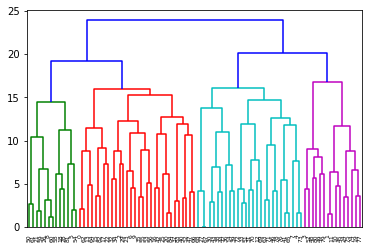

In [252]:
X = np.array(anomaly['Temperature'])
absX = X - np.min(X)
dendrogram = sch.dendrogram(sch.linkage(absX[0:3570],method='ward'))

In [253]:
Dt = np.zeros(7140).reshape(3570, 2)
for i in range(3570):
    Dt[i][0] = i + 1
    Dt[i][1] = X[i]

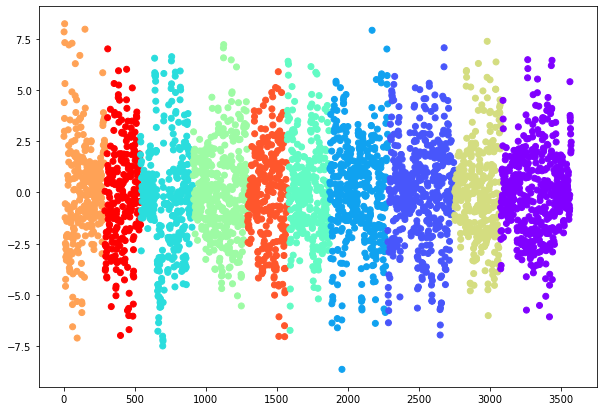

In [254]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')

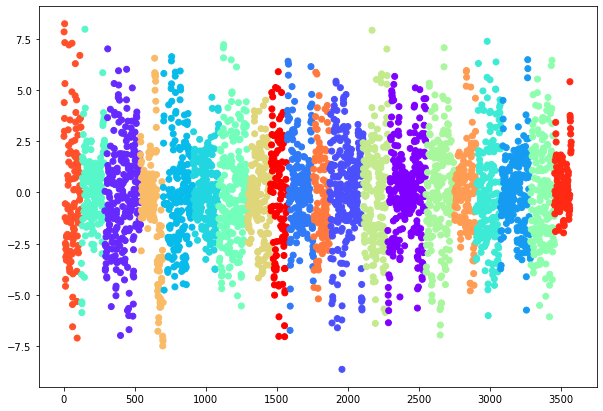

In [255]:
cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')

In [2]:
df = pd.read_csv('Delhi_Temp_1989_1998_anomaly.csv')
df

Unnamed: 0  Temperature
0     1989-01-01     2.739136
1     1989-01-02     7.838440
2     1989-01-03     4.387085
3     1989-01-04     2.989075
4     1989-01-05     3.614136
...          ...          ...
3647  1998-12-27    -1.543304
3648  1998-12-28    -2.241974
3649  1998-12-29    -1.248810
3650  1998-12-30    -0.696106
3651  1998-12-31    -1.596069

[3652 rows x 2 columns]

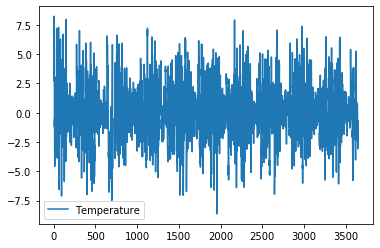

In [3]:
df.plot()

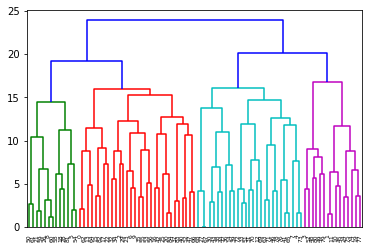

In [7]:
X = np.array(df['Temperature'])
absX = X - np.min(X)
dendrogram = sch.dendrogram(sch.linkage(absX[0:3570],method='ward'))

In [8]:
Dt = np.zeros(7140).reshape(3570, 2)
for i in range(3570):
    Dt[i][0] = i + 1
    Dt[i][1] = X[i]

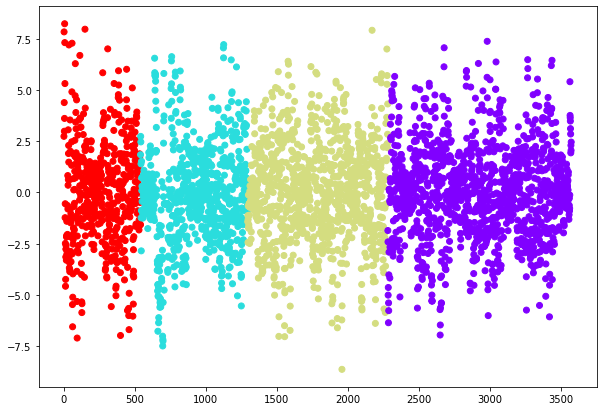

In [9]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')

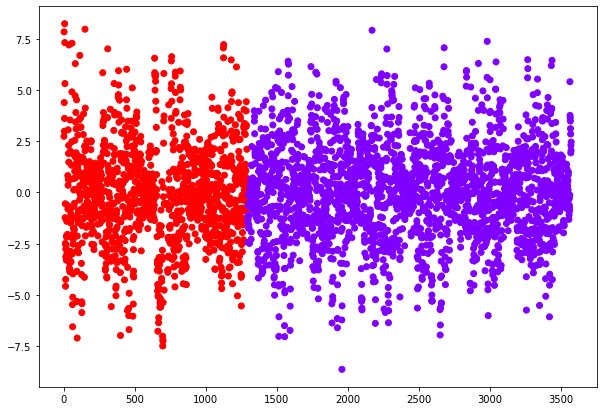

In [10]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')

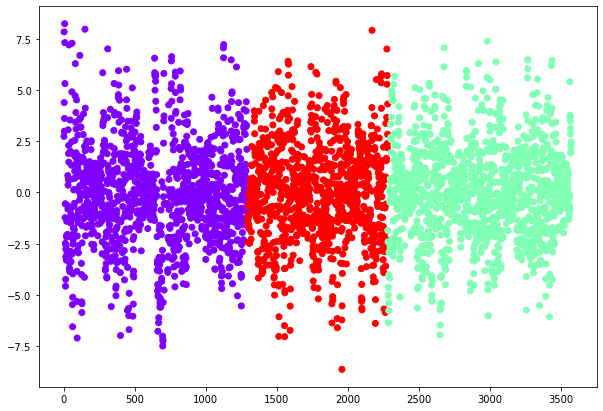

In [11]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(Dt)
plt.figure(figsize=(10, 7))
plt.scatter(Dt[:,0], Dt[:,1], c=cluster.labels_, cmap='rainbow')

In [8]:
all_years = []
for file in glob.glob('Dataset_Raw/99-2003/*.nc'):
    print(file[20:24] +" -> This is the year")
    data = Dataset(file, 'r')
    #print(data)
    time = data.variables['time']
    print(time)
    year = file[20:24]
    all_years.append(year)

2003 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (365,)
filling off
2008 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (366,)
filling off
2016 -> This is the year
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: verification time generated by wgrib2 function verftime()
    units: seconds since 1970-01-01 00:00:00.0 0:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (366,)
filling off
2015 -> This is the ye

In [9]:
all_years.sort()

In [10]:
all_years

['1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [11]:
year_start = min(all_years)
year_end = max(all_years)
print(year_start)
print(year_end)
date_range = pd.date_range(start = year_start + '-01-01', end=year_end + '-12-31', freq='D' )
df = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)
df

1999
2019


Temperature
1999-01-01          0.0
1999-01-02          0.0
1999-01-03          0.0
1999-01-04          0.0
1999-01-05          0.0
...                 ...
2019-12-27          0.0
2019-12-28          0.0
2019-12-29          0.0
2019-12-30          0.0
2019-12-31          0.0

[7670 rows x 1 columns]

In [14]:
for yr in all_years:
    # reading in the data
    data = Dataset('Dataset_Raw/99-2003/' + yr + '.nc', 'r')
    
    # store the latitude and longitude data from the dataset
    latitude = data.variables['latitude'][:]
    longitude = data.variables['longitude'][:]
    
    #squared difference between the specified latitude and longitude 
    sq_diff_lat = (latitude - lat)**2
    sq_diff_lon = (longitude - lon)**2
    
    #identify the index of hte minimum  value for lat and lon
    min_index_lat  = sq_diff_lat.argmin()
    min_index_lon  = sq_diff_lon.argmin()
    
    # accessing the temperature data
    temp = data.variables['TMP_2m']
    
    # creating the date range for each year
    start = str(yr) + '-01-01'
    end = str(yr) + '-12-31'
    d_range = pd.date_range(start=start, end = end , freq='D')
    length = data.variables['TMP_2m'].shape[0]
    for t_index in np.arange(length):
        print('Recording the value for :'+str(d_range[t_index]))
        df.loc[d_range[t_index]]['Temperature'] = temp[t_index , min_index_lat, min_index_lon]

Recording the value for :1999-01-01 00:00:00
Recording the value for :1999-01-02 00:00:00
Recording the value for :1999-01-03 00:00:00
Recording the value for :1999-01-04 00:00:00
Recording the value for :1999-01-05 00:00:00
Recording the value for :1999-01-06 00:00:00
Recording the value for :1999-01-07 00:00:00
Recording the value for :1999-01-08 00:00:00
Recording the value for :1999-01-09 00:00:00
Recording the value for :1999-01-10 00:00:00
Recording the value for :1999-01-11 00:00:00
Recording the value for :1999-01-12 00:00:00
Recording the value for :1999-01-13 00:00:00
Recording the value for :1999-01-14 00:00:00
Recording the value for :1999-01-15 00:00:00
Recording the value for :1999-01-16 00:00:00
Recording the value for :1999-01-17 00:00:00
Recording the value for :1999-01-18 00:00:00
Recording the value for :1999-01-19 00:00:00
Recording the value for :1999-01-20 00:00:00
Recording the value for :1999-01-21 00:00:00
Recording the value for :1999-01-22 00:00:00
Recording 

Recording the value for :1999-07-12 00:00:00
Recording the value for :1999-07-13 00:00:00
Recording the value for :1999-07-14 00:00:00
Recording the value for :1999-07-15 00:00:00
Recording the value for :1999-07-16 00:00:00
Recording the value for :1999-07-17 00:00:00
Recording the value for :1999-07-18 00:00:00
Recording the value for :1999-07-19 00:00:00
Recording the value for :1999-07-20 00:00:00
Recording the value for :1999-07-21 00:00:00
Recording the value for :1999-07-22 00:00:00
Recording the value for :1999-07-23 00:00:00
Recording the value for :1999-07-24 00:00:00
Recording the value for :1999-07-25 00:00:00
Recording the value for :1999-07-26 00:00:00
Recording the value for :1999-07-27 00:00:00
Recording the value for :1999-07-28 00:00:00
Recording the value for :1999-07-29 00:00:00
Recording the value for :1999-07-30 00:00:00
Recording the value for :1999-07-31 00:00:00
Recording the value for :1999-08-01 00:00:00
Recording the value for :1999-08-02 00:00:00
Recording 

Recording the value for :2000-01-26 00:00:00
Recording the value for :2000-01-27 00:00:00
Recording the value for :2000-01-28 00:00:00
Recording the value for :2000-01-29 00:00:00
Recording the value for :2000-01-30 00:00:00
Recording the value for :2000-01-31 00:00:00
Recording the value for :2000-02-01 00:00:00
Recording the value for :2000-02-02 00:00:00
Recording the value for :2000-02-03 00:00:00
Recording the value for :2000-02-04 00:00:00
Recording the value for :2000-02-05 00:00:00
Recording the value for :2000-02-06 00:00:00
Recording the value for :2000-02-07 00:00:00
Recording the value for :2000-02-08 00:00:00
Recording the value for :2000-02-09 00:00:00
Recording the value for :2000-02-10 00:00:00
Recording the value for :2000-02-11 00:00:00
Recording the value for :2000-02-12 00:00:00
Recording the value for :2000-02-13 00:00:00
Recording the value for :2000-02-14 00:00:00
Recording the value for :2000-02-15 00:00:00
Recording the value for :2000-02-16 00:00:00
Recording 

Recording the value for :2000-08-07 00:00:00
Recording the value for :2000-08-08 00:00:00
Recording the value for :2000-08-09 00:00:00
Recording the value for :2000-08-10 00:00:00
Recording the value for :2000-08-11 00:00:00
Recording the value for :2000-08-12 00:00:00
Recording the value for :2000-08-13 00:00:00
Recording the value for :2000-08-14 00:00:00
Recording the value for :2000-08-15 00:00:00
Recording the value for :2000-08-16 00:00:00
Recording the value for :2000-08-17 00:00:00
Recording the value for :2000-08-18 00:00:00
Recording the value for :2000-08-19 00:00:00
Recording the value for :2000-08-20 00:00:00
Recording the value for :2000-08-21 00:00:00
Recording the value for :2000-08-22 00:00:00
Recording the value for :2000-08-23 00:00:00
Recording the value for :2000-08-24 00:00:00
Recording the value for :2000-08-25 00:00:00
Recording the value for :2000-08-26 00:00:00
Recording the value for :2000-08-27 00:00:00
Recording the value for :2000-08-28 00:00:00
Recording 

Recording the value for :2001-02-21 00:00:00
Recording the value for :2001-02-22 00:00:00
Recording the value for :2001-02-23 00:00:00
Recording the value for :2001-02-24 00:00:00
Recording the value for :2001-02-25 00:00:00
Recording the value for :2001-02-26 00:00:00
Recording the value for :2001-02-27 00:00:00
Recording the value for :2001-02-28 00:00:00
Recording the value for :2001-03-01 00:00:00
Recording the value for :2001-03-02 00:00:00
Recording the value for :2001-03-03 00:00:00
Recording the value for :2001-03-04 00:00:00
Recording the value for :2001-03-05 00:00:00
Recording the value for :2001-03-06 00:00:00
Recording the value for :2001-03-07 00:00:00
Recording the value for :2001-03-08 00:00:00
Recording the value for :2001-03-09 00:00:00
Recording the value for :2001-03-10 00:00:00
Recording the value for :2001-03-11 00:00:00
Recording the value for :2001-03-12 00:00:00
Recording the value for :2001-03-13 00:00:00
Recording the value for :2001-03-14 00:00:00
Recording 

Recording the value for :2002-01-20 00:00:00
Recording the value for :2002-01-21 00:00:00
Recording the value for :2002-01-22 00:00:00
Recording the value for :2002-01-23 00:00:00
Recording the value for :2002-01-24 00:00:00
Recording the value for :2002-01-25 00:00:00
Recording the value for :2002-01-26 00:00:00
Recording the value for :2002-01-27 00:00:00
Recording the value for :2002-01-28 00:00:00
Recording the value for :2002-01-29 00:00:00
Recording the value for :2002-01-30 00:00:00
Recording the value for :2002-01-31 00:00:00
Recording the value for :2002-02-01 00:00:00
Recording the value for :2002-02-02 00:00:00
Recording the value for :2002-02-03 00:00:00
Recording the value for :2002-02-04 00:00:00
Recording the value for :2002-02-05 00:00:00
Recording the value for :2002-02-06 00:00:00
Recording the value for :2002-02-07 00:00:00
Recording the value for :2002-02-08 00:00:00
Recording the value for :2002-02-09 00:00:00
Recording the value for :2002-02-10 00:00:00
Recording 

Recording the value for :2002-07-25 00:00:00
Recording the value for :2002-07-26 00:00:00
Recording the value for :2002-07-27 00:00:00
Recording the value for :2002-07-28 00:00:00
Recording the value for :2002-07-29 00:00:00
Recording the value for :2002-07-30 00:00:00
Recording the value for :2002-07-31 00:00:00
Recording the value for :2002-08-01 00:00:00
Recording the value for :2002-08-02 00:00:00
Recording the value for :2002-08-03 00:00:00
Recording the value for :2002-08-04 00:00:00
Recording the value for :2002-08-05 00:00:00
Recording the value for :2002-08-06 00:00:00
Recording the value for :2002-08-07 00:00:00
Recording the value for :2002-08-08 00:00:00
Recording the value for :2002-08-09 00:00:00
Recording the value for :2002-08-10 00:00:00
Recording the value for :2002-08-11 00:00:00
Recording the value for :2002-08-12 00:00:00
Recording the value for :2002-08-13 00:00:00
Recording the value for :2002-08-14 00:00:00
Recording the value for :2002-08-15 00:00:00
Recording 

Recording the value for :2003-03-03 00:00:00
Recording the value for :2003-03-04 00:00:00
Recording the value for :2003-03-05 00:00:00
Recording the value for :2003-03-06 00:00:00
Recording the value for :2003-03-07 00:00:00
Recording the value for :2003-03-08 00:00:00
Recording the value for :2003-03-09 00:00:00
Recording the value for :2003-03-10 00:00:00
Recording the value for :2003-03-11 00:00:00
Recording the value for :2003-03-12 00:00:00
Recording the value for :2003-03-13 00:00:00
Recording the value for :2003-03-14 00:00:00
Recording the value for :2003-03-15 00:00:00
Recording the value for :2003-03-16 00:00:00
Recording the value for :2003-03-17 00:00:00
Recording the value for :2003-03-18 00:00:00
Recording the value for :2003-03-19 00:00:00
Recording the value for :2003-03-20 00:00:00
Recording the value for :2003-03-21 00:00:00
Recording the value for :2003-03-22 00:00:00
Recording the value for :2003-03-23 00:00:00
Recording the value for :2003-03-24 00:00:00
Recording 

Recording the value for :2003-09-11 00:00:00
Recording the value for :2003-09-12 00:00:00
Recording the value for :2003-09-13 00:00:00
Recording the value for :2003-09-14 00:00:00
Recording the value for :2003-09-15 00:00:00
Recording the value for :2003-09-16 00:00:00
Recording the value for :2003-09-17 00:00:00
Recording the value for :2003-09-18 00:00:00
Recording the value for :2003-09-19 00:00:00
Recording the value for :2003-09-20 00:00:00
Recording the value for :2003-09-21 00:00:00
Recording the value for :2003-09-22 00:00:00
Recording the value for :2003-09-23 00:00:00
Recording the value for :2003-09-24 00:00:00
Recording the value for :2003-09-25 00:00:00
Recording the value for :2003-09-26 00:00:00
Recording the value for :2003-09-27 00:00:00
Recording the value for :2003-09-28 00:00:00
Recording the value for :2003-09-29 00:00:00
Recording the value for :2003-09-30 00:00:00
Recording the value for :2003-10-01 00:00:00
Recording the value for :2003-10-02 00:00:00
Recording 

Recording the value for :2004-03-15 00:00:00
Recording the value for :2004-03-16 00:00:00
Recording the value for :2004-03-17 00:00:00
Recording the value for :2004-03-18 00:00:00
Recording the value for :2004-03-19 00:00:00
Recording the value for :2004-03-20 00:00:00
Recording the value for :2004-03-21 00:00:00
Recording the value for :2004-03-22 00:00:00
Recording the value for :2004-03-23 00:00:00
Recording the value for :2004-03-24 00:00:00
Recording the value for :2004-03-25 00:00:00
Recording the value for :2004-03-26 00:00:00
Recording the value for :2004-03-27 00:00:00
Recording the value for :2004-03-28 00:00:00
Recording the value for :2004-03-29 00:00:00
Recording the value for :2004-03-30 00:00:00
Recording the value for :2004-03-31 00:00:00
Recording the value for :2004-04-01 00:00:00
Recording the value for :2004-04-02 00:00:00
Recording the value for :2004-04-03 00:00:00
Recording the value for :2004-04-04 00:00:00
Recording the value for :2004-04-05 00:00:00
Recording 

Recording the value for :2004-09-23 00:00:00
Recording the value for :2004-09-24 00:00:00
Recording the value for :2004-09-25 00:00:00
Recording the value for :2004-09-26 00:00:00
Recording the value for :2004-09-27 00:00:00
Recording the value for :2004-09-28 00:00:00
Recording the value for :2004-09-29 00:00:00
Recording the value for :2004-09-30 00:00:00
Recording the value for :2004-10-01 00:00:00
Recording the value for :2004-10-02 00:00:00
Recording the value for :2004-10-03 00:00:00
Recording the value for :2004-10-04 00:00:00
Recording the value for :2004-10-05 00:00:00
Recording the value for :2004-10-06 00:00:00
Recording the value for :2004-10-07 00:00:00
Recording the value for :2004-10-08 00:00:00
Recording the value for :2004-10-09 00:00:00
Recording the value for :2004-10-10 00:00:00
Recording the value for :2004-10-11 00:00:00
Recording the value for :2004-10-12 00:00:00
Recording the value for :2004-10-13 00:00:00
Recording the value for :2004-10-14 00:00:00
Recording 

Recording the value for :2005-03-25 00:00:00
Recording the value for :2005-03-26 00:00:00
Recording the value for :2005-03-27 00:00:00
Recording the value for :2005-03-28 00:00:00
Recording the value for :2005-03-29 00:00:00
Recording the value for :2005-03-30 00:00:00
Recording the value for :2005-03-31 00:00:00
Recording the value for :2005-04-01 00:00:00
Recording the value for :2005-04-02 00:00:00
Recording the value for :2005-04-03 00:00:00
Recording the value for :2005-04-04 00:00:00
Recording the value for :2005-04-05 00:00:00
Recording the value for :2005-04-06 00:00:00
Recording the value for :2005-04-07 00:00:00
Recording the value for :2005-04-08 00:00:00
Recording the value for :2005-04-09 00:00:00
Recording the value for :2005-04-10 00:00:00
Recording the value for :2005-04-11 00:00:00
Recording the value for :2005-04-12 00:00:00
Recording the value for :2005-04-13 00:00:00
Recording the value for :2005-04-14 00:00:00
Recording the value for :2005-04-15 00:00:00
Recording 

Recording the value for :2005-10-04 00:00:00
Recording the value for :2005-10-05 00:00:00
Recording the value for :2005-10-06 00:00:00
Recording the value for :2005-10-07 00:00:00
Recording the value for :2005-10-08 00:00:00
Recording the value for :2005-10-09 00:00:00
Recording the value for :2005-10-10 00:00:00
Recording the value for :2005-10-11 00:00:00
Recording the value for :2005-10-12 00:00:00
Recording the value for :2005-10-13 00:00:00
Recording the value for :2005-10-14 00:00:00
Recording the value for :2005-10-15 00:00:00
Recording the value for :2005-10-16 00:00:00
Recording the value for :2005-10-17 00:00:00
Recording the value for :2005-10-18 00:00:00
Recording the value for :2005-10-19 00:00:00
Recording the value for :2005-10-20 00:00:00
Recording the value for :2005-10-21 00:00:00
Recording the value for :2005-10-22 00:00:00
Recording the value for :2005-10-23 00:00:00
Recording the value for :2005-10-24 00:00:00
Recording the value for :2005-10-25 00:00:00
Recording 

Recording the value for :2006-04-11 00:00:00
Recording the value for :2006-04-12 00:00:00
Recording the value for :2006-04-13 00:00:00
Recording the value for :2006-04-14 00:00:00
Recording the value for :2006-04-15 00:00:00
Recording the value for :2006-04-16 00:00:00
Recording the value for :2006-04-17 00:00:00
Recording the value for :2006-04-18 00:00:00
Recording the value for :2006-04-19 00:00:00
Recording the value for :2006-04-20 00:00:00
Recording the value for :2006-04-21 00:00:00
Recording the value for :2006-04-22 00:00:00
Recording the value for :2006-04-23 00:00:00
Recording the value for :2006-04-24 00:00:00
Recording the value for :2006-04-25 00:00:00
Recording the value for :2006-04-26 00:00:00
Recording the value for :2006-04-27 00:00:00
Recording the value for :2006-04-28 00:00:00
Recording the value for :2006-04-29 00:00:00
Recording the value for :2006-04-30 00:00:00
Recording the value for :2006-05-01 00:00:00
Recording the value for :2006-05-02 00:00:00
Recording 

Recording the value for :2006-10-21 00:00:00
Recording the value for :2006-10-22 00:00:00
Recording the value for :2006-10-23 00:00:00
Recording the value for :2006-10-24 00:00:00
Recording the value for :2006-10-25 00:00:00
Recording the value for :2006-10-26 00:00:00
Recording the value for :2006-10-27 00:00:00
Recording the value for :2006-10-28 00:00:00
Recording the value for :2006-10-29 00:00:00
Recording the value for :2006-10-30 00:00:00
Recording the value for :2006-10-31 00:00:00
Recording the value for :2006-11-01 00:00:00
Recording the value for :2006-11-02 00:00:00
Recording the value for :2006-11-03 00:00:00
Recording the value for :2006-11-04 00:00:00
Recording the value for :2006-11-05 00:00:00
Recording the value for :2006-11-06 00:00:00
Recording the value for :2006-11-07 00:00:00
Recording the value for :2006-11-08 00:00:00
Recording the value for :2006-11-09 00:00:00
Recording the value for :2006-11-10 00:00:00
Recording the value for :2006-11-11 00:00:00
Recording 

Recording the value for :2007-05-10 00:00:00
Recording the value for :2007-05-11 00:00:00
Recording the value for :2007-05-12 00:00:00
Recording the value for :2007-05-13 00:00:00
Recording the value for :2007-05-14 00:00:00
Recording the value for :2007-05-15 00:00:00
Recording the value for :2007-05-16 00:00:00
Recording the value for :2007-05-17 00:00:00
Recording the value for :2007-05-18 00:00:00
Recording the value for :2007-05-19 00:00:00
Recording the value for :2007-05-20 00:00:00
Recording the value for :2007-05-21 00:00:00
Recording the value for :2007-05-22 00:00:00
Recording the value for :2007-05-23 00:00:00
Recording the value for :2007-05-24 00:00:00
Recording the value for :2007-05-25 00:00:00
Recording the value for :2007-05-26 00:00:00
Recording the value for :2007-05-27 00:00:00
Recording the value for :2007-05-28 00:00:00
Recording the value for :2007-05-29 00:00:00
Recording the value for :2007-05-30 00:00:00
Recording the value for :2007-05-31 00:00:00
Recording 

Recording the value for :2007-11-23 00:00:00
Recording the value for :2007-11-24 00:00:00
Recording the value for :2007-11-25 00:00:00
Recording the value for :2007-11-26 00:00:00
Recording the value for :2007-11-27 00:00:00
Recording the value for :2007-11-28 00:00:00
Recording the value for :2007-11-29 00:00:00
Recording the value for :2007-11-30 00:00:00
Recording the value for :2007-12-01 00:00:00
Recording the value for :2007-12-02 00:00:00
Recording the value for :2007-12-03 00:00:00
Recording the value for :2007-12-04 00:00:00
Recording the value for :2007-12-05 00:00:00
Recording the value for :2007-12-06 00:00:00
Recording the value for :2007-12-07 00:00:00
Recording the value for :2007-12-08 00:00:00
Recording the value for :2007-12-09 00:00:00
Recording the value for :2007-12-10 00:00:00
Recording the value for :2007-12-11 00:00:00
Recording the value for :2007-12-12 00:00:00
Recording the value for :2007-12-13 00:00:00
Recording the value for :2007-12-14 00:00:00
Recording 

Recording the value for :2008-05-27 00:00:00
Recording the value for :2008-05-28 00:00:00
Recording the value for :2008-05-29 00:00:00
Recording the value for :2008-05-30 00:00:00
Recording the value for :2008-05-31 00:00:00
Recording the value for :2008-06-01 00:00:00
Recording the value for :2008-06-02 00:00:00
Recording the value for :2008-06-03 00:00:00
Recording the value for :2008-06-04 00:00:00
Recording the value for :2008-06-05 00:00:00
Recording the value for :2008-06-06 00:00:00
Recording the value for :2008-06-07 00:00:00
Recording the value for :2008-06-08 00:00:00
Recording the value for :2008-06-09 00:00:00
Recording the value for :2008-06-10 00:00:00
Recording the value for :2008-06-11 00:00:00
Recording the value for :2008-06-12 00:00:00
Recording the value for :2008-06-13 00:00:00
Recording the value for :2008-06-14 00:00:00
Recording the value for :2008-06-15 00:00:00
Recording the value for :2008-06-16 00:00:00
Recording the value for :2008-06-17 00:00:00
Recording 

Recording the value for :2008-12-06 00:00:00
Recording the value for :2008-12-07 00:00:00
Recording the value for :2008-12-08 00:00:00
Recording the value for :2008-12-09 00:00:00
Recording the value for :2008-12-10 00:00:00
Recording the value for :2008-12-11 00:00:00
Recording the value for :2008-12-12 00:00:00
Recording the value for :2008-12-13 00:00:00
Recording the value for :2008-12-14 00:00:00
Recording the value for :2008-12-15 00:00:00
Recording the value for :2008-12-16 00:00:00
Recording the value for :2008-12-17 00:00:00
Recording the value for :2008-12-18 00:00:00
Recording the value for :2008-12-19 00:00:00
Recording the value for :2008-12-20 00:00:00
Recording the value for :2008-12-21 00:00:00
Recording the value for :2008-12-22 00:00:00
Recording the value for :2008-12-23 00:00:00
Recording the value for :2008-12-24 00:00:00
Recording the value for :2008-12-25 00:00:00
Recording the value for :2008-12-26 00:00:00
Recording the value for :2008-12-27 00:00:00
Recording 

Recording the value for :2009-06-12 00:00:00
Recording the value for :2009-06-13 00:00:00
Recording the value for :2009-06-14 00:00:00
Recording the value for :2009-06-15 00:00:00
Recording the value for :2009-06-16 00:00:00
Recording the value for :2009-06-17 00:00:00
Recording the value for :2009-06-18 00:00:00
Recording the value for :2009-06-19 00:00:00
Recording the value for :2009-06-20 00:00:00
Recording the value for :2009-06-21 00:00:00
Recording the value for :2009-06-22 00:00:00
Recording the value for :2009-06-23 00:00:00
Recording the value for :2009-06-24 00:00:00
Recording the value for :2009-06-25 00:00:00
Recording the value for :2009-06-26 00:00:00
Recording the value for :2009-06-27 00:00:00
Recording the value for :2009-06-28 00:00:00
Recording the value for :2009-06-29 00:00:00
Recording the value for :2009-06-30 00:00:00
Recording the value for :2009-07-01 00:00:00
Recording the value for :2009-07-02 00:00:00
Recording the value for :2009-07-03 00:00:00
Recording 

Recording the value for :2009-12-26 00:00:00
Recording the value for :2009-12-27 00:00:00
Recording the value for :2009-12-28 00:00:00
Recording the value for :2009-12-29 00:00:00
Recording the value for :2009-12-30 00:00:00
Recording the value for :2009-12-31 00:00:00
Recording the value for :2010-01-01 00:00:00
Recording the value for :2010-01-02 00:00:00
Recording the value for :2010-01-03 00:00:00
Recording the value for :2010-01-04 00:00:00
Recording the value for :2010-01-05 00:00:00
Recording the value for :2010-01-06 00:00:00
Recording the value for :2010-01-07 00:00:00
Recording the value for :2010-01-08 00:00:00
Recording the value for :2010-01-09 00:00:00
Recording the value for :2010-01-10 00:00:00
Recording the value for :2010-01-11 00:00:00
Recording the value for :2010-01-12 00:00:00
Recording the value for :2010-01-13 00:00:00
Recording the value for :2010-01-14 00:00:00
Recording the value for :2010-01-15 00:00:00
Recording the value for :2010-01-16 00:00:00
Recording 

Recording the value for :2010-06-30 00:00:00
Recording the value for :2010-07-01 00:00:00
Recording the value for :2010-07-02 00:00:00
Recording the value for :2010-07-03 00:00:00
Recording the value for :2010-07-04 00:00:00
Recording the value for :2010-07-05 00:00:00
Recording the value for :2010-07-06 00:00:00
Recording the value for :2010-07-07 00:00:00
Recording the value for :2010-07-08 00:00:00
Recording the value for :2010-07-09 00:00:00
Recording the value for :2010-07-10 00:00:00
Recording the value for :2010-07-11 00:00:00
Recording the value for :2010-07-12 00:00:00
Recording the value for :2010-07-13 00:00:00
Recording the value for :2010-07-14 00:00:00
Recording the value for :2010-07-15 00:00:00
Recording the value for :2010-07-16 00:00:00
Recording the value for :2010-07-17 00:00:00
Recording the value for :2010-07-18 00:00:00
Recording the value for :2010-07-19 00:00:00
Recording the value for :2010-07-20 00:00:00
Recording the value for :2010-07-21 00:00:00
Recording 

Recording the value for :2011-01-02 00:00:00
Recording the value for :2011-01-03 00:00:00
Recording the value for :2011-01-04 00:00:00
Recording the value for :2011-01-05 00:00:00
Recording the value for :2011-01-06 00:00:00
Recording the value for :2011-01-07 00:00:00
Recording the value for :2011-01-08 00:00:00
Recording the value for :2011-01-09 00:00:00
Recording the value for :2011-01-10 00:00:00
Recording the value for :2011-01-11 00:00:00
Recording the value for :2011-01-12 00:00:00
Recording the value for :2011-01-13 00:00:00
Recording the value for :2011-01-14 00:00:00
Recording the value for :2011-01-15 00:00:00
Recording the value for :2011-01-16 00:00:00
Recording the value for :2011-01-17 00:00:00
Recording the value for :2011-01-18 00:00:00
Recording the value for :2011-01-19 00:00:00
Recording the value for :2011-01-20 00:00:00
Recording the value for :2011-01-21 00:00:00
Recording the value for :2011-01-22 00:00:00
Recording the value for :2011-01-23 00:00:00
Recording 

Recording the value for :2011-07-08 00:00:00
Recording the value for :2011-07-09 00:00:00
Recording the value for :2011-07-10 00:00:00
Recording the value for :2011-07-11 00:00:00
Recording the value for :2011-07-12 00:00:00
Recording the value for :2011-07-13 00:00:00
Recording the value for :2011-07-14 00:00:00
Recording the value for :2011-07-15 00:00:00
Recording the value for :2011-07-16 00:00:00
Recording the value for :2011-07-17 00:00:00
Recording the value for :2011-07-18 00:00:00
Recording the value for :2011-07-19 00:00:00
Recording the value for :2011-07-20 00:00:00
Recording the value for :2011-07-21 00:00:00
Recording the value for :2011-07-22 00:00:00
Recording the value for :2011-07-23 00:00:00
Recording the value for :2011-07-24 00:00:00
Recording the value for :2011-07-25 00:00:00
Recording the value for :2011-07-26 00:00:00
Recording the value for :2011-07-27 00:00:00
Recording the value for :2011-07-28 00:00:00
Recording the value for :2011-07-29 00:00:00
Recording 

Recording the value for :2012-01-10 00:00:00
Recording the value for :2012-01-11 00:00:00
Recording the value for :2012-01-12 00:00:00
Recording the value for :2012-01-13 00:00:00
Recording the value for :2012-01-14 00:00:00
Recording the value for :2012-01-15 00:00:00
Recording the value for :2012-01-16 00:00:00
Recording the value for :2012-01-17 00:00:00
Recording the value for :2012-01-18 00:00:00
Recording the value for :2012-01-19 00:00:00
Recording the value for :2012-01-20 00:00:00
Recording the value for :2012-01-21 00:00:00
Recording the value for :2012-01-22 00:00:00
Recording the value for :2012-01-23 00:00:00
Recording the value for :2012-01-24 00:00:00
Recording the value for :2012-01-25 00:00:00
Recording the value for :2012-01-26 00:00:00
Recording the value for :2012-01-27 00:00:00
Recording the value for :2012-01-28 00:00:00
Recording the value for :2012-01-29 00:00:00
Recording the value for :2012-01-30 00:00:00
Recording the value for :2012-01-31 00:00:00
Recording 

Recording the value for :2012-07-11 00:00:00
Recording the value for :2012-07-12 00:00:00
Recording the value for :2012-07-13 00:00:00
Recording the value for :2012-07-14 00:00:00
Recording the value for :2012-07-15 00:00:00
Recording the value for :2012-07-16 00:00:00
Recording the value for :2012-07-17 00:00:00
Recording the value for :2012-07-18 00:00:00
Recording the value for :2012-07-19 00:00:00
Recording the value for :2012-07-20 00:00:00
Recording the value for :2012-07-21 00:00:00
Recording the value for :2012-07-22 00:00:00
Recording the value for :2012-07-23 00:00:00
Recording the value for :2012-07-24 00:00:00
Recording the value for :2012-07-25 00:00:00
Recording the value for :2012-07-26 00:00:00
Recording the value for :2012-07-27 00:00:00
Recording the value for :2012-07-28 00:00:00
Recording the value for :2012-07-29 00:00:00
Recording the value for :2012-07-30 00:00:00
Recording the value for :2012-07-31 00:00:00
Recording the value for :2012-08-01 00:00:00
Recording 

Recording the value for :2013-01-18 00:00:00
Recording the value for :2013-01-19 00:00:00
Recording the value for :2013-01-20 00:00:00
Recording the value for :2013-01-21 00:00:00
Recording the value for :2013-01-22 00:00:00
Recording the value for :2013-01-23 00:00:00
Recording the value for :2013-01-24 00:00:00
Recording the value for :2013-01-25 00:00:00
Recording the value for :2013-01-26 00:00:00
Recording the value for :2013-01-27 00:00:00
Recording the value for :2013-01-28 00:00:00
Recording the value for :2013-01-29 00:00:00
Recording the value for :2013-01-30 00:00:00
Recording the value for :2013-01-31 00:00:00
Recording the value for :2013-02-01 00:00:00
Recording the value for :2013-02-02 00:00:00
Recording the value for :2013-02-03 00:00:00
Recording the value for :2013-02-04 00:00:00
Recording the value for :2013-02-05 00:00:00
Recording the value for :2013-02-06 00:00:00
Recording the value for :2013-02-07 00:00:00
Recording the value for :2013-02-08 00:00:00
Recording 

Recording the value for :2013-07-25 00:00:00
Recording the value for :2013-07-26 00:00:00
Recording the value for :2013-07-27 00:00:00
Recording the value for :2013-07-28 00:00:00
Recording the value for :2013-07-29 00:00:00
Recording the value for :2013-07-30 00:00:00
Recording the value for :2013-07-31 00:00:00
Recording the value for :2013-08-01 00:00:00
Recording the value for :2013-08-02 00:00:00
Recording the value for :2013-08-03 00:00:00
Recording the value for :2013-08-04 00:00:00
Recording the value for :2013-08-05 00:00:00
Recording the value for :2013-08-06 00:00:00
Recording the value for :2013-08-07 00:00:00
Recording the value for :2013-08-08 00:00:00
Recording the value for :2013-08-09 00:00:00
Recording the value for :2013-08-10 00:00:00
Recording the value for :2013-08-11 00:00:00
Recording the value for :2013-08-12 00:00:00
Recording the value for :2013-08-13 00:00:00
Recording the value for :2013-08-14 00:00:00
Recording the value for :2013-08-15 00:00:00
Recording 

Recording the value for :2014-01-28 00:00:00
Recording the value for :2014-01-29 00:00:00
Recording the value for :2014-01-30 00:00:00
Recording the value for :2014-01-31 00:00:00
Recording the value for :2014-02-01 00:00:00
Recording the value for :2014-02-02 00:00:00
Recording the value for :2014-02-03 00:00:00
Recording the value for :2014-02-04 00:00:00
Recording the value for :2014-02-05 00:00:00
Recording the value for :2014-02-06 00:00:00
Recording the value for :2014-02-07 00:00:00
Recording the value for :2014-02-08 00:00:00
Recording the value for :2014-02-09 00:00:00
Recording the value for :2014-02-10 00:00:00
Recording the value for :2014-02-11 00:00:00
Recording the value for :2014-02-12 00:00:00
Recording the value for :2014-02-13 00:00:00
Recording the value for :2014-02-14 00:00:00
Recording the value for :2014-02-15 00:00:00
Recording the value for :2014-02-16 00:00:00
Recording the value for :2014-02-17 00:00:00
Recording the value for :2014-02-18 00:00:00
Recording 

Recording the value for :2014-08-06 00:00:00
Recording the value for :2014-08-07 00:00:00
Recording the value for :2014-08-08 00:00:00
Recording the value for :2014-08-09 00:00:00
Recording the value for :2014-08-10 00:00:00
Recording the value for :2014-08-11 00:00:00
Recording the value for :2014-08-12 00:00:00
Recording the value for :2014-08-13 00:00:00
Recording the value for :2014-08-14 00:00:00
Recording the value for :2014-08-15 00:00:00
Recording the value for :2014-08-16 00:00:00
Recording the value for :2014-08-17 00:00:00
Recording the value for :2014-08-18 00:00:00
Recording the value for :2014-08-19 00:00:00
Recording the value for :2014-08-20 00:00:00
Recording the value for :2014-08-21 00:00:00
Recording the value for :2014-08-22 00:00:00
Recording the value for :2014-08-23 00:00:00
Recording the value for :2014-08-24 00:00:00
Recording the value for :2014-08-25 00:00:00
Recording the value for :2014-08-26 00:00:00
Recording the value for :2014-08-27 00:00:00
Recording 

Recording the value for :2015-02-08 00:00:00
Recording the value for :2015-02-09 00:00:00
Recording the value for :2015-02-10 00:00:00
Recording the value for :2015-02-11 00:00:00
Recording the value for :2015-02-12 00:00:00
Recording the value for :2015-02-13 00:00:00
Recording the value for :2015-02-14 00:00:00
Recording the value for :2015-02-15 00:00:00
Recording the value for :2015-02-16 00:00:00
Recording the value for :2015-02-17 00:00:00
Recording the value for :2015-02-18 00:00:00
Recording the value for :2015-02-19 00:00:00
Recording the value for :2015-02-20 00:00:00
Recording the value for :2015-02-21 00:00:00
Recording the value for :2015-02-22 00:00:00
Recording the value for :2015-02-23 00:00:00
Recording the value for :2015-02-24 00:00:00
Recording the value for :2015-02-25 00:00:00
Recording the value for :2015-02-26 00:00:00
Recording the value for :2015-02-27 00:00:00
Recording the value for :2015-02-28 00:00:00
Recording the value for :2015-03-01 00:00:00
Recording 

Recording the value for :2015-08-18 00:00:00
Recording the value for :2015-08-19 00:00:00
Recording the value for :2015-08-20 00:00:00
Recording the value for :2015-08-21 00:00:00
Recording the value for :2015-08-22 00:00:00
Recording the value for :2015-08-23 00:00:00
Recording the value for :2015-08-24 00:00:00
Recording the value for :2015-08-25 00:00:00
Recording the value for :2015-08-26 00:00:00
Recording the value for :2015-08-27 00:00:00
Recording the value for :2015-08-28 00:00:00
Recording the value for :2015-08-29 00:00:00
Recording the value for :2015-08-30 00:00:00
Recording the value for :2015-08-31 00:00:00
Recording the value for :2015-09-01 00:00:00
Recording the value for :2015-09-02 00:00:00
Recording the value for :2015-09-03 00:00:00
Recording the value for :2015-09-04 00:00:00
Recording the value for :2015-09-05 00:00:00
Recording the value for :2015-09-06 00:00:00
Recording the value for :2015-09-07 00:00:00
Recording the value for :2015-09-08 00:00:00
Recording 

Recording the value for :2016-02-19 00:00:00
Recording the value for :2016-02-20 00:00:00
Recording the value for :2016-02-21 00:00:00
Recording the value for :2016-02-22 00:00:00
Recording the value for :2016-02-23 00:00:00
Recording the value for :2016-02-24 00:00:00
Recording the value for :2016-02-25 00:00:00
Recording the value for :2016-02-26 00:00:00
Recording the value for :2016-02-27 00:00:00
Recording the value for :2016-02-28 00:00:00
Recording the value for :2016-02-29 00:00:00
Recording the value for :2016-03-01 00:00:00
Recording the value for :2016-03-02 00:00:00
Recording the value for :2016-03-03 00:00:00
Recording the value for :2016-03-04 00:00:00
Recording the value for :2016-03-05 00:00:00
Recording the value for :2016-03-06 00:00:00
Recording the value for :2016-03-07 00:00:00
Recording the value for :2016-03-08 00:00:00
Recording the value for :2016-03-09 00:00:00
Recording the value for :2016-03-10 00:00:00
Recording the value for :2016-03-11 00:00:00
Recording 

Recording the value for :2016-09-02 00:00:00
Recording the value for :2016-09-03 00:00:00
Recording the value for :2016-09-04 00:00:00
Recording the value for :2016-09-05 00:00:00
Recording the value for :2016-09-06 00:00:00
Recording the value for :2016-09-07 00:00:00
Recording the value for :2016-09-08 00:00:00
Recording the value for :2016-09-09 00:00:00
Recording the value for :2016-09-10 00:00:00
Recording the value for :2016-09-11 00:00:00
Recording the value for :2016-09-12 00:00:00
Recording the value for :2016-09-13 00:00:00
Recording the value for :2016-09-14 00:00:00
Recording the value for :2016-09-15 00:00:00
Recording the value for :2016-09-16 00:00:00
Recording the value for :2016-09-17 00:00:00
Recording the value for :2016-09-18 00:00:00
Recording the value for :2016-09-19 00:00:00
Recording the value for :2016-09-20 00:00:00
Recording the value for :2016-09-21 00:00:00
Recording the value for :2016-09-22 00:00:00
Recording the value for :2016-09-23 00:00:00
Recording 

Recording the value for :2017-03-04 00:00:00
Recording the value for :2017-03-05 00:00:00
Recording the value for :2017-03-06 00:00:00
Recording the value for :2017-03-07 00:00:00
Recording the value for :2017-03-08 00:00:00
Recording the value for :2017-03-09 00:00:00
Recording the value for :2017-03-10 00:00:00
Recording the value for :2017-03-11 00:00:00
Recording the value for :2017-03-12 00:00:00
Recording the value for :2017-03-13 00:00:00
Recording the value for :2017-03-14 00:00:00
Recording the value for :2017-03-15 00:00:00
Recording the value for :2017-03-16 00:00:00
Recording the value for :2017-03-17 00:00:00
Recording the value for :2017-03-18 00:00:00
Recording the value for :2017-03-19 00:00:00
Recording the value for :2017-03-20 00:00:00
Recording the value for :2017-03-21 00:00:00
Recording the value for :2017-03-22 00:00:00
Recording the value for :2017-03-23 00:00:00
Recording the value for :2017-03-24 00:00:00
Recording the value for :2017-03-25 00:00:00
Recording 

Recording the value for :2017-09-20 00:00:00
Recording the value for :2017-09-21 00:00:00
Recording the value for :2017-09-22 00:00:00
Recording the value for :2017-09-23 00:00:00
Recording the value for :2017-09-24 00:00:00
Recording the value for :2017-09-25 00:00:00
Recording the value for :2017-09-26 00:00:00
Recording the value for :2017-09-27 00:00:00
Recording the value for :2017-09-28 00:00:00
Recording the value for :2017-09-29 00:00:00
Recording the value for :2017-09-30 00:00:00
Recording the value for :2017-10-01 00:00:00
Recording the value for :2017-10-02 00:00:00
Recording the value for :2017-10-03 00:00:00
Recording the value for :2017-10-04 00:00:00
Recording the value for :2017-10-05 00:00:00
Recording the value for :2017-10-06 00:00:00
Recording the value for :2017-10-07 00:00:00
Recording the value for :2017-10-08 00:00:00
Recording the value for :2017-10-09 00:00:00
Recording the value for :2017-10-10 00:00:00
Recording the value for :2017-10-11 00:00:00
Recording 

Recording the value for :2018-03-22 00:00:00
Recording the value for :2018-03-23 00:00:00
Recording the value for :2018-03-24 00:00:00
Recording the value for :2018-03-25 00:00:00
Recording the value for :2018-03-26 00:00:00
Recording the value for :2018-03-27 00:00:00
Recording the value for :2018-03-28 00:00:00
Recording the value for :2018-03-29 00:00:00
Recording the value for :2018-03-30 00:00:00
Recording the value for :2018-03-31 00:00:00
Recording the value for :2018-04-01 00:00:00
Recording the value for :2018-04-02 00:00:00
Recording the value for :2018-04-03 00:00:00
Recording the value for :2018-04-04 00:00:00
Recording the value for :2018-04-05 00:00:00
Recording the value for :2018-04-06 00:00:00
Recording the value for :2018-04-07 00:00:00
Recording the value for :2018-04-08 00:00:00
Recording the value for :2018-04-09 00:00:00
Recording the value for :2018-04-10 00:00:00
Recording the value for :2018-04-11 00:00:00
Recording the value for :2018-04-12 00:00:00
Recording 

Recording the value for :2018-10-04 00:00:00
Recording the value for :2018-10-05 00:00:00
Recording the value for :2018-10-06 00:00:00
Recording the value for :2018-10-07 00:00:00
Recording the value for :2018-10-08 00:00:00
Recording the value for :2018-10-09 00:00:00
Recording the value for :2018-10-10 00:00:00
Recording the value for :2018-10-11 00:00:00
Recording the value for :2018-10-12 00:00:00
Recording the value for :2018-10-13 00:00:00
Recording the value for :2018-10-14 00:00:00
Recording the value for :2018-10-15 00:00:00
Recording the value for :2018-10-16 00:00:00
Recording the value for :2018-10-17 00:00:00
Recording the value for :2018-10-18 00:00:00
Recording the value for :2018-10-19 00:00:00
Recording the value for :2018-10-20 00:00:00
Recording the value for :2018-10-21 00:00:00
Recording the value for :2018-10-22 00:00:00
Recording the value for :2018-10-23 00:00:00
Recording the value for :2018-10-24 00:00:00
Recording the value for :2018-10-25 00:00:00
Recording 

Recording the value for :2019-04-08 00:00:00
Recording the value for :2019-04-09 00:00:00
Recording the value for :2019-04-10 00:00:00
Recording the value for :2019-04-11 00:00:00
Recording the value for :2019-04-12 00:00:00
Recording the value for :2019-04-13 00:00:00
Recording the value for :2019-04-14 00:00:00
Recording the value for :2019-04-15 00:00:00
Recording the value for :2019-04-16 00:00:00
Recording the value for :2019-04-17 00:00:00
Recording the value for :2019-04-18 00:00:00
Recording the value for :2019-04-19 00:00:00
Recording the value for :2019-04-20 00:00:00
Recording the value for :2019-04-21 00:00:00
Recording the value for :2019-04-22 00:00:00
Recording the value for :2019-04-23 00:00:00
Recording the value for :2019-04-24 00:00:00
Recording the value for :2019-04-25 00:00:00
Recording the value for :2019-04-26 00:00:00
Recording the value for :2019-04-27 00:00:00
Recording the value for :2019-04-28 00:00:00
Recording the value for :2019-04-29 00:00:00
Recording 

Recording the value for :2019-10-12 00:00:00
Recording the value for :2019-10-13 00:00:00
Recording the value for :2019-10-14 00:00:00
Recording the value for :2019-10-15 00:00:00
Recording the value for :2019-10-16 00:00:00
Recording the value for :2019-10-17 00:00:00
Recording the value for :2019-10-18 00:00:00
Recording the value for :2019-10-19 00:00:00
Recording the value for :2019-10-20 00:00:00
Recording the value for :2019-10-21 00:00:00
Recording the value for :2019-10-22 00:00:00
Recording the value for :2019-10-23 00:00:00
Recording the value for :2019-10-24 00:00:00
Recording the value for :2019-10-25 00:00:00
Recording the value for :2019-10-26 00:00:00
Recording the value for :2019-10-27 00:00:00
Recording the value for :2019-10-28 00:00:00
Recording the value for :2019-10-29 00:00:00
Recording the value for :2019-10-30 00:00:00
Recording the value for :2019-10-31 00:00:00
Recording the value for :2019-11-01 00:00:00
Recording the value for :2019-11-02 00:00:00
Recording 

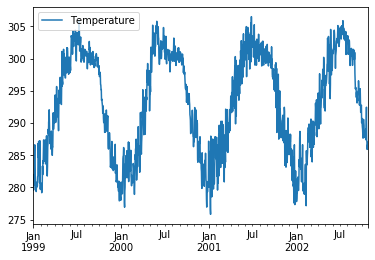

In [63]:
df[0:1395].plot()

In [25]:
data = Dataset('Dataset_Raw/99-2003/2000.nc', 'r')
latitude = data.variables['latitude'][:]
longitude = data.variables['longitude'][:]
    
    #squared difference between the specified latitude and longitude 
sq_diff_lat = (latitude - lat)**2
sq_diff_lon = (longitude - lon)**2
    

In [59]:

start = '2001-01-01'
end = '2001-12-31'
d_range = pd.date_range(start=start, end = end , freq='D')
#length = data.variables['TMP_2m'].shape[0]
#    for t_index in np.arange(length):
#data = Dataset('Dataset_Raw/99-2003/2000.nc', 'r')

In [39]:
temp = data.variables['TMP_2m']

In [33]:

    #identify the index of hte minimum  value for lat and lon
min_index_lat  = sq_diff_lat.argmin()
min_index_lon  = sq_diff_lon.argmin()
    
    # accessing the temperature data


In [58]:
np.random.choice(all_years[4:])

'2008'

In [62]:
for i in np.arange(len(d_range)):
    date = np.random.choice(all_years[4:])+'-'+ str(d_range[i])[5:10]
    df['Temperature']['2001-' + str(d_range[i])[5:10]] = df['Temperature'][date]
    print(date + ' : temp is : ' )

2009-01-01 : temp is : 
2005-01-02 : temp is : 
2010-01-03 : temp is : 
2019-01-04 : temp is : 
2009-01-05 : temp is : 
2018-01-06 : temp is : 
2011-01-07 : temp is : 
2007-01-08 : temp is : 
2008-01-09 : temp is : 
2018-01-10 : temp is : 
2003-01-11 : temp is : 
2004-01-12 : temp is : 
2015-01-13 : temp is : 
2019-01-14 : temp is : 
2006-01-15 : temp is : 
2014-01-16 : temp is : 
2006-01-17 : temp is : 
2006-01-18 : temp is : 
2010-01-19 : temp is : 
2012-01-20 : temp is : 
2013-01-21 : temp is : 
2006-01-22 : temp is : 
2003-01-23 : temp is : 
2013-01-24 : temp is : 
2004-01-25 : temp is : 
2011-01-26 : temp is : 
2003-01-27 : temp is : 
2007-01-28 : temp is : 
2017-01-29 : temp is : 
2014-01-30 : temp is : 
2004-01-31 : temp is : 
2003-02-01 : temp is : 
2006-02-02 : temp is : 
2009-02-03 : temp is : 
2019-02-04 : temp is : 
2009-02-05 : temp is : 
2016-02-06 : temp is : 
2005-02-07 : temp is : 
2016-02-08 : temp is : 
2003-02-09 : temp is : 
2003-02-10 : temp is : 
2005-02-11 : tem

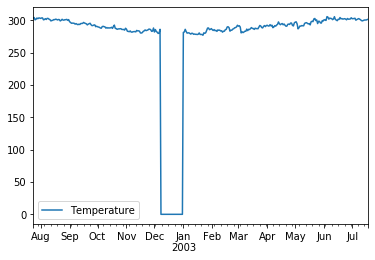

In [70]:
df[1300:1660].plot()

In [74]:
start = '2002-12-08'
end = '2002-12-31'
d_range = pd.date_range(start=start, end = end , freq='D')

In [76]:
for i in np.arange(len(d_range)):
    date = np.random.choice(all_years[4:])+'-'+ str(d_range[i])[5:10]
    print(date + ' : temp is : ' + str(df['Temperature']['2002-' + str(d_range[i])[5:10]]))
    df['Temperature']['2002-' + str(d_range[i])[5:10]] = df['Temperature'][date]
    

2013-12-08 : temp is : 0.0
2019-12-09 : temp is : 0.0
2005-12-10 : temp is : 0.0
2013-12-11 : temp is : 0.0
2007-12-12 : temp is : 0.0
2013-12-13 : temp is : 0.0
2008-12-14 : temp is : 0.0
2007-12-15 : temp is : 0.0
2017-12-16 : temp is : 0.0
2018-12-17 : temp is : 0.0
2011-12-18 : temp is : 0.0
2006-12-19 : temp is : 0.0
2014-12-20 : temp is : 0.0
2008-12-21 : temp is : 0.0
2009-12-22 : temp is : 0.0
2012-12-23 : temp is : 0.0
2009-12-24 : temp is : 0.0
2008-12-25 : temp is : 0.0
2019-12-26 : temp is : 0.0
2015-12-27 : temp is : 0.0
2019-12-28 : temp is : 0.0
2017-12-29 : temp is : 0.0
2010-12-30 : temp is : 0.0
2012-12-31 : temp is : 0.0


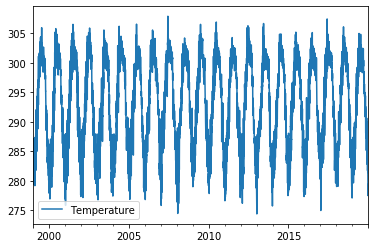

In [78]:
df.plot()

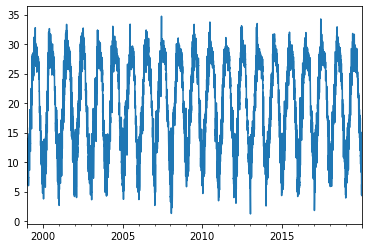

In [82]:
celsiusAvgDf = df['Temperature'].apply(conv_to_celsius)
celsiusAvgDf.plot()

In [84]:
celsiusAvgDf.to_csv('Delhi_Temp_1999_2019.csv')

Now we have to do the same thing as we did here to all the prev unknown values

In [86]:
df1 = pd.read_csv('Delhi_Temp_1979_1983.csv')

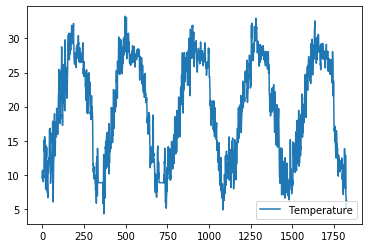

In [87]:
df1.plot()

In [89]:
df1['Unnamed: 0']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
1821    1983-12-27
1822    1983-12-28
1823    1983-12-29
1824    1983-12-30
1825    1983-12-31
Name: Unnamed: 0, Length: 1826, dtype: object

In [92]:
df1 = df1.set_index('Unnamed: 0')

In [94]:
df1['Temperature']['1979-01-22']

7.904534912109398

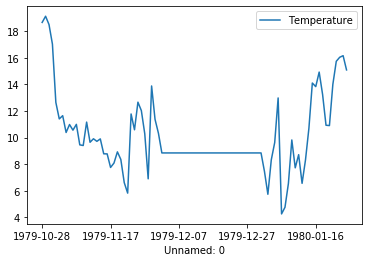

In [98]:
df1[300:390].plot()

In [99]:
start = '1979-12-01'
end = '1979-12-31'
d_range = pd.date_range(start=start, end = end , freq='D')

In [107]:
for i in np.arange(len(d_range)):
    date = np.random.choice(all_years[4:])+'-'+ str(d_range[i])[5:10]
    print(date + ' : temp is : ' + str(df1['Temperature']['1979-' + str(d_range[i])[5:10]]))
    df1['Temperature']['1979-' + str(d_range[i])[5:10]] = df['Temperature'][date]

2017-12-01 : temp is : 282.9866638183594
2009-12-02 : temp is : 278.80059814453125
2007-12-03 : temp is : 282.1942138671875
2019-12-04 : temp is : 279.7392272949219
2014-12-05 : temp is : 285.1328125
2005-12-06 : temp is : 281.40008544921875
2005-12-07 : temp is : 283.1654052734375
2011-12-08 : temp is : 282.83795166015625
2017-12-09 : temp is : 288.78460693359375
2019-12-10 : temp is : 287.0252380371094
2018-12-11 : temp is : 281.780517578125
2015-12-12 : temp is : 288.0836486816406
2016-12-13 : temp is : 285.9114990234375
2004-12-14 : temp is : 281.3370666503906
2003-12-15 : temp is : 282.90008544921875
2004-12-16 : temp is : 287.0943298339844
2013-12-17 : temp is : 283.4226379394531
2005-12-18 : temp is : 282.5207824707031
2017-12-19 : temp is : 279.1275634765625
2008-12-20 : temp is : 279.87481689453125
2007-12-21 : temp is : 283.81561279296875
2009-12-22 : temp is : 285.2469482421875
2003-12-23 : temp is : 282.97674560546875
2013-12-24 : temp is : 278.74755859375
2007-12-25 : temp

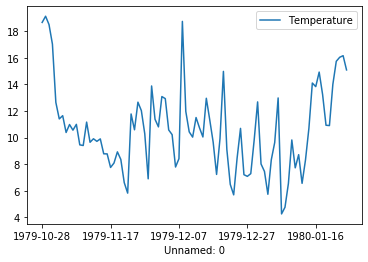

In [108]:
df1[300:390].plot()

In [105]:
df = pd.DataFrame(celsiusAvgDf)

In [106]:
df

Temperature
1999-01-01     8.505457
1999-01-02     6.420129
1999-01-03     8.837610
1999-01-04     7.260461
1999-01-05     7.894006
...                 ...
2019-12-27     5.887415
2019-12-28     4.440454
2019-12-29     6.229852
2019-12-30     4.322656
2019-12-31     4.435083

[7670 rows x 1 columns]

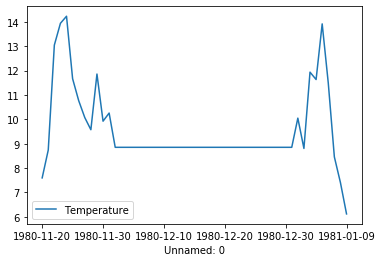

In [116]:
df1[689:740].plot()

In [119]:
start = '1980-12-02'
end = '1980-12-31'
d_range = pd.date_range(start=start, end = end , freq='D')

In [121]:
for i in np.arange(len(d_range)):
    date = np.random.choice(all_years[4:])+'-'+ str(d_range[i])[5:10]
    print(date + ' : temp is : ' + str(df1['Temperature']['1980-' + str(d_range[i])[5:10]]))
    df1['Temperature']['1980-' + str(d_range[i])[5:10]] = df['Temperature'][date]

2013-12-02 : temp is : 8.850000000000025
2011-12-03 : temp is : 8.850000000000025
2009-12-04 : temp is : 8.850000000000025
2017-12-05 : temp is : 8.850000000000025
2004-12-06 : temp is : 8.850000000000025
2019-12-07 : temp is : 8.850000000000025
2015-12-08 : temp is : 8.850000000000025
2017-12-09 : temp is : 8.850000000000025
2013-12-10 : temp is : 8.850000000000025
2016-12-11 : temp is : 8.850000000000025
2008-12-12 : temp is : 8.850000000000025
2007-12-13 : temp is : 8.850000000000025
2016-12-14 : temp is : 8.850000000000025
2014-12-15 : temp is : 8.850000000000025
2007-12-16 : temp is : 8.850000000000025
2017-12-17 : temp is : 8.850000000000025
2009-12-18 : temp is : 8.850000000000025
2006-12-19 : temp is : 8.850000000000025
2018-12-20 : temp is : 8.850000000000025
2014-12-21 : temp is : 8.850000000000025
2010-12-22 : temp is : 8.850000000000025
2005-12-23 : temp is : 8.850000000000025
2008-12-24 : temp is : 8.850000000000025
2008-12-25 : temp is : 8.850000000000025
2003-12-26 : tem

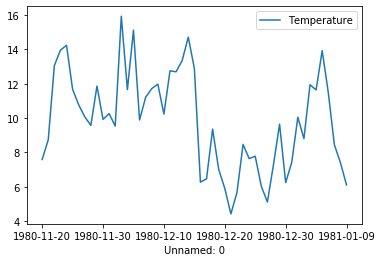

In [122]:
df1[689:740].plot()

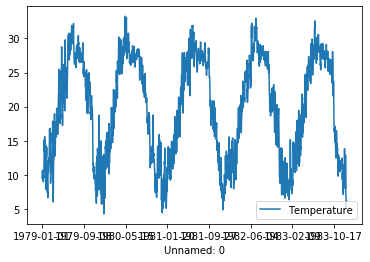

In [123]:
df1.plot()

In [124]:
df2 = pd.read_csv('Delhi_Temp_1984_1988.csv')

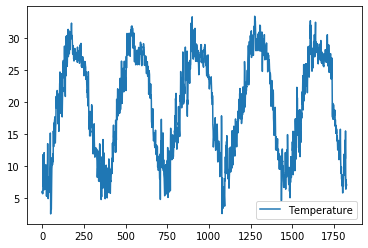

In [125]:
df2.plot()

In [126]:
df2

Unnamed: 0  Temperature
0     1984-01-01     5.899408
1     1984-01-02     6.141748
2     1984-01-03     5.869867
3     1984-01-04     5.719446
4     1984-01-05     5.832025
...          ...          ...
1822  1988-12-27     6.436975
1823  1988-12-28     6.795557
1824  1988-12-29     7.908655
1825  1988-12-30     6.970819
1826  1988-12-31     7.078607

[1827 rows x 2 columns]

In [127]:
df2 = df2.set_index('Unnamed: 0')

In [128]:
df2

Temperature
Unnamed: 0             
1984-01-01     5.899408
1984-01-02     6.141748
1984-01-03     5.869867
1984-01-04     5.719446
1984-01-05     5.832025
...                 ...
1988-12-27     6.436975
1988-12-28     6.795557
1988-12-29     7.908655
1988-12-30     6.970819
1988-12-31     7.078607

[1827 rows x 1 columns]

In [131]:
df3 = pd.read_csv('Delhi_Temp_1989_1998.csv')

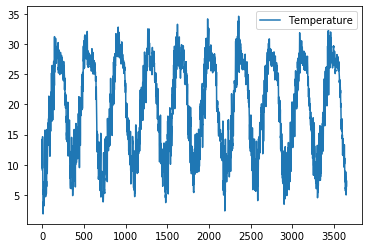

In [132]:
df3.plot()

In [134]:
df3 = df3.set_index('Unnamed: 0')

In [135]:
frames = [df1, df2, df3]

result = pd.concat(frames)

In [138]:
result


Temperature
Unnamed: 0             
1979-01-01     9.511102
1979-01-02    10.235986
1979-01-03    10.662592
1979-01-04     9.479639
1979-01-05     9.404688
...                 ...
1998-12-27     6.516229
1998-12-28     5.817560
1998-12-29     6.810724
1998-12-30     7.363428
1998-12-31     6.463464

[7305 rows x 1 columns]

In [139]:
df

Temperature
1999-01-01     8.505457
1999-01-02     6.420129
1999-01-03     8.837610
1999-01-04     7.260461
1999-01-05     7.894006
...                 ...
2019-12-27     5.887415
2019-12-28     4.440454
2019-12-29     6.229852
2019-12-30     4.322656
2019-12-31     4.435083

[7670 rows x 1 columns]

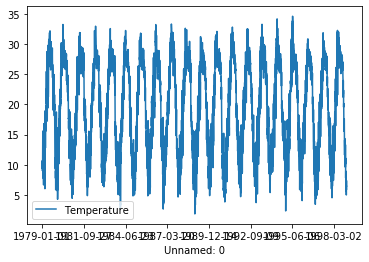

In [137]:
result.plot()

In [140]:
frames = [result, df]
kdf = pd.concat(frames)

In [141]:
kdf

Temperature
1979-01-01              9.511102
1979-01-02             10.235986
1979-01-03             10.662592
1979-01-04              9.479639
1979-01-05              9.404688
...                          ...
2019-12-27 00:00:00     5.887415
2019-12-28 00:00:00     4.440454
2019-12-29 00:00:00     6.229852
2019-12-30 00:00:00     4.322656
2019-12-31 00:00:00     4.435083

[14975 rows x 1 columns]

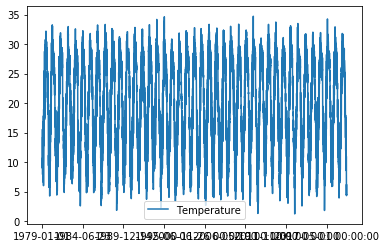

In [142]:
kdf.plot()

In [144]:
date_range = pd.date_range(start = '2004-01-01', end='2004-12-31', freq='D' )
df_avg = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)


In [11]:
df_avg = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)
df_avg

Temperature
2004-01-01          0.0
2004-01-02          0.0
2004-01-03          0.0
2004-01-04          0.0
2004-01-05          0.0
...                 ...
2004-12-27          0.0
2004-12-28          0.0
2004-12-29          0.0
2004-12-30          0.0
2004-12-31          0.0

[366 rows x 1 columns]

In [148]:
years = np.arange(1979,2020)

In [149]:
years

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [151]:
for yr in years:
    print(str(yr) + '-01-01')

1979-01-01
1980-01-01
1981-01-01
1982-01-01
1983-01-01
1984-01-01
1985-01-01
1986-01-01
1987-01-01
1988-01-01
1989-01-01
1990-01-01
1991-01-01
1992-01-01
1993-01-01
1994-01-01
1995-01-01
1996-01-01
1997-01-01
1998-01-01
1999-01-01
2000-01-01
2001-01-01
2002-01-01
2003-01-01
2004-01-01
2005-01-01
2006-01-01
2007-01-01
2008-01-01
2009-01-01
2010-01-01
2011-01-01
2012-01-01
2013-01-01
2014-01-01
2015-01-01
2016-01-01
2017-01-01
2018-01-01
2019-01-01


In [162]:
kdf.to_csv('Delhi_Temp_1979_2019.csv')

In [155]:
rs = pd.read_csv('Delhi_Temp_1999_2019.csv')

In [157]:
rs = rs.set_index('Unnamed: 0')

In [159]:
rs

Temperature
Unnamed: 0             
1999-01-01     8.505457
1999-01-02     6.420129
1999-01-03     8.837610
1999-01-04     7.260461
1999-01-05     7.894006
...                 ...
2019-12-27     5.887415
2019-12-28     4.440454
2019-12-29     6.229852
2019-12-30     4.322656
2019-12-31     4.435083

[7670 rows x 1 columns]

In [158]:
result

Temperature
Unnamed: 0             
1979-01-01     9.511102
1979-01-02    10.235986
1979-01-03    10.662592
1979-01-04     9.479639
1979-01-05     9.404688
...                 ...
1998-12-27     6.516229
1998-12-28     5.817560
1998-12-29     6.810724
1998-12-30     7.363428
1998-12-31     6.463464

[7305 rows x 1 columns]

In [160]:
frames = [result, rs]
kdf = pd.concat(frames)

In [161]:
kdf

Temperature
Unnamed: 0             
1979-01-01     9.511102
1979-01-02    10.235986
1979-01-03    10.662592
1979-01-04     9.479639
1979-01-05     9.404688
...                 ...
2019-12-27     5.887415
2019-12-28     4.440454
2019-12-29     6.229852
2019-12-30     4.322656
2019-12-31     4.435083

[14975 rows x 1 columns]

In [163]:
for yr in years:
    print('Temperature on ' + str(yr) + '-01-01 was : ' + str(kdf['Temperature'][str(yr) + '-01-01']))

Temperature on 1979-01-01 was : 9.5111022949219
Temperature on 1980-01-01 was : 7.461206054687523
Temperature on 1981-01-01 was : 10.04863891601565
Temperature on 1982-01-01 was : 8.492669677734398
Temperature on 1983-01-01 was : 9.092614746093775
Temperature on 1984-01-01 was : 5.899407958984398
Temperature on 1985-01-01 was : 9.203698730468775
Temperature on 1986-01-01 was : 8.326440429687523
Temperature on 1987-01-01 was : 8.022241210937523
Temperature on 1988-01-01 was : 6.436914062500023
Temperature on 1989-01-01 was : 9.151757812500025
Temperature on 1990-01-01 was : 5.227441406250024
Temperature on 1991-01-01 was : 3.9213500976562727
Temperature on 1992-01-01 was : 7.010339355468773
Temperature on 1993-01-01 was : 11.044763183593775
Temperature on 1994-01-01 was : 8.343499755859398
Temperature on 1995-01-01 was : 2.3301635742187727
Temperature on 1996-01-01 was : 9.021936035156275
Temperature on 1997-01-01 was : 8.970727539062525
Temperature on 1998-01-01 was : 8.020959472656273

In [8]:
days = np.arange(1, 32)

In [9]:
months = np.arange(1,13)

In [10]:
years = np.arange(1979,2020)


In [30]:
kdf

Unnamed: 0  Temperature
0      1979-01-01     9.511102
1      1979-01-02    10.235986
2      1979-01-03    10.662592
3      1979-01-04     9.479639
4      1979-01-05     9.404688
...           ...          ...
14970  2019-12-27     5.887415
14971  2019-12-28     4.440454
14972  2019-12-29     6.229852
14973  2019-12-30     4.322656
14974  2019-12-31     4.435083

[14975 rows x 2 columns]

In [32]:
for day in days:
    for month in months:
        temp_sum = 0
        count = 0
        date2 = '2004-' + to_string(month) + '-'+to_string(day)
        correctDat = None
        try:
            nwDat = datetime.datetime(2004, month, day)
            correctDat = True
        except ValueError:
            correctDat = False
        if correctDat == False:
            continue
        for yr in years:
            date = str(yr) + '-' + to_string(month) + '-'+to_string(day)
            correctDate = None
            try:
                newDate = datetime.datetime(yr,month,day)
                correctDate = True
            except ValueError:
                correctDate = False
            if correctDate:
                temp_sum += kdf['Temperature'][date]
                count +=1
        average = 0.01
        average = temp_sum/(count *(1.0))
        if month == 5:
            break
        #df_avg['Temperature'][date2] = average
        print('Temperature on '+ date2 + ' is : '+ str(average) + ' = ' + str(df_avg['Temperature'][date2]))
        
        
            

Temperature on 2004-01-01 is : 7.942683373427995 = 0.0
Temperature on 2004-02-01 is : 10.033004984041563 = 0.0
Temperature on 2004-03-01 is : 13.742231266673043 = 0.0
Temperature on 2004-04-01 is : 18.519609255907035 = 0.0
Temperature on 2004-01-02 is : 8.33100392411397 = 0.0
Temperature on 2004-02-02 is : 9.789678657345679 = 0.0
Temperature on 2004-03-02 is : 13.914195586413895 = 0.0
Temperature on 2004-04-02 is : 18.855153004716104 = 0.0
Temperature on 2004-01-03 is : 8.397707906583483 = 0.0
Temperature on 2004-02-03 is : 10.126324760623117 = 0.0
Temperature on 2004-03-03 is : 13.4591144840892 = 0.0
Temperature on 2004-04-03 is : 18.655140797684854 = 0.0
Temperature on 2004-01-04 is : 8.051207602896364 = 0.0
Temperature on 2004-02-04 is : 10.38217297065551 = 0.0
Temperature on 2004-03-04 is : 14.14643956626336 = 0.0
Temperature on 2004-04-04 is : 18.521509533393697 = 0.0
Temperature on 2004-01-05 is : 8.776914122046518 = 0.0
Temperature on 2004-02-05 is : 10.429538484899032 = 0.0
Tem

In [199]:
df_avg

Temperature
2004-01-01          0.0
2004-01-02          0.0
2004-01-03          0.0
2004-01-04          0.0
2004-01-05          0.0
...                 ...
2004-12-27          0.0
2004-12-28          0.0
2004-12-29          0.0
2004-12-30          0.0
2004-12-31          0.0

[366 rows x 1 columns]

In [183]:
df_avg['Temperature']['2004-01-01']

7.942683373427995

In [7]:
date_range = pd.date_range(start = '2004-01-01', end='2004-12-31', freq='D' )
aver_temp = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)

In [205]:
aver_temp

Temperature
2004-01-01          0.0
2004-01-02          0.0
2004-01-03          0.0
2004-01-04          0.0
2004-01-05          0.0
...                 ...
2004-12-27          0.0
2004-12-28          0.0
2004-12-29          0.0
2004-12-30          0.0
2004-12-31          0.0

[366 rows x 1 columns]

In [202]:
avg_temp = np.array([])

In [203]:
avg_temp

array([], dtype=float64)

In [206]:
for date in date_range:
    aver_temp['Temperature'][date] = df_avg['Temperature'][str(date)[0:10]]
    print('Temp on '+str(date)[0:10]+' was '+str(df_avg['Temperature'][str(date)[0:10]]))

Temp on 2004-01-01 was 7.942683373427995
Temp on 2004-01-02 was 8.33100392411397
Temp on 2004-01-03 was 8.397707906583483
Temp on 2004-01-04 was 8.051207602896364
Temp on 2004-01-05 was 8.776914122046518
Temp on 2004-01-06 was 8.610154165872737
Temp on 2004-01-07 was 8.08215317144629
Temp on 2004-01-08 was 8.442828518006882
Temp on 2004-01-09 was 8.497429675590723
Temp on 2004-01-10 was 8.397464510289657
Temp on 2004-01-11 was 8.104913330078148
Temp on 2004-01-12 was 8.251208644960007
Temp on 2004-01-13 was 8.52949025223897
Temp on 2004-01-14 was 8.538780249618926
Temp on 2004-01-15 was 9.178149562928759
Temp on 2004-01-16 was 8.683708228134552
Temp on 2004-01-17 was 9.054977640291563
Temp on 2004-01-18 was 8.751614305449717
Temp on 2004-01-19 was 8.415830882002691
Temp on 2004-01-20 was 7.806674715367782
Temp on 2004-01-21 was 8.570561702077006
Temp on 2004-01-22 was 8.859989668683331
Temp on 2004-01-23 was 9.183209526248117
Temp on 2004-01-24 was 8.621654082507645
Temp on 2004-01-25 

In [195]:
date

Timestamp('2004-12-31 00:00:00', freq='D')

In [200]:
df_avg['Temperature'][date]

8.15119212080795

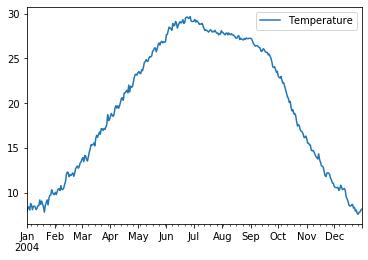

In [207]:
aver_temp.plot()

In [209]:
aver_temp.to_csv('Average_temperature_delhi_year.csv')

In [211]:
kdf['Temperature']['1983-02-20']

11.366845703125026

In [212]:
date_range = pd.date_range(start = '1979-01-01', end='2019-12-31', freq='D' )

In [214]:
date_range[0:10]

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10'],
              dtype='datetime64[ns]', freq='D')

In [218]:
date_range = pd.date_range(start = '1979-01-01', end='2019-12-31', freq='D' )
anomal = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)


In [223]:
anomal['Temperature']

1979-01-01    7.942683
1979-01-02    8.331004
1979-01-03    8.397708
1979-01-04    8.051208
1979-01-05    8.776914
                ...   
2019-12-27    0.000000
2019-12-28    0.000000
2019-12-29    0.000000
2019-12-30    0.000000
2019-12-31    0.000000
Freq: D, Name: Temperature, Length: 14975, dtype: float64

In [224]:
aver_temp['Temperature'][avg_date]

8.397464510289657

In [229]:
date_range = pd.date_range(start = '1979-01-01', end='2019-12-31', freq='D' )
anomal = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)

for date in date_range:
    avg_date = '2004'+str(date)[4:10]
    #print(kdf['Temperature'][str(date)[0:10]])
    anomal['Temperature'][date] = kdf['Temperature'][str(date)[0:10]] - aver_temp['Temperature'][avg_date]

In [230]:
anomal

Temperature
1979-01-01     1.568419
1979-01-02     1.904982
1979-01-03     2.264884
1979-01-04     1.428431
1979-01-05     0.627773
...                 ...
2019-12-27    -1.683937
2019-12-28    -3.338001
2019-12-29    -1.593236
2019-12-30    -3.727411
2019-12-31    -3.716109

[14975 rows x 1 columns]

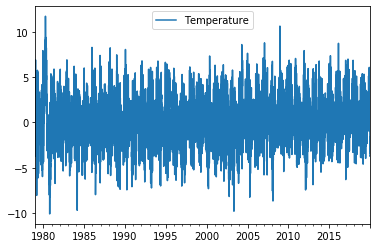

In [231]:
anomal.plot()

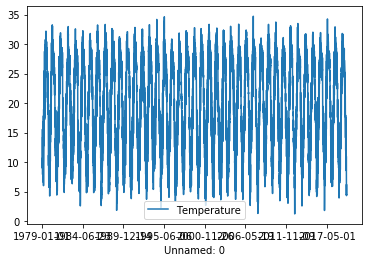

In [233]:
kdf.plot()


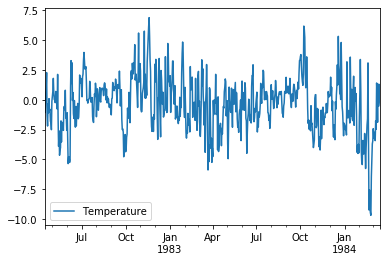

In [236]:
anomal[1200:1900].plot()

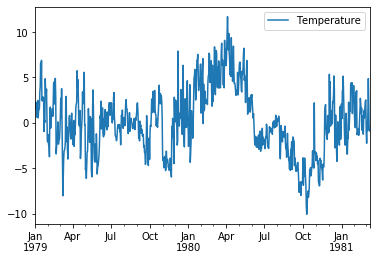

In [238]:
anomal[0:800].plot()

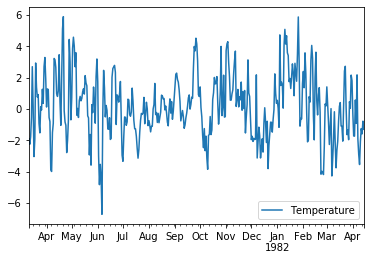

In [239]:
anomal[800:1200].plot()

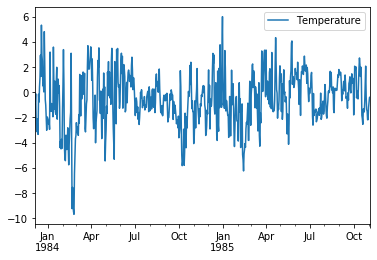

In [241]:
anomal[1800:2500].plot()

In [240]:
anomal.to_csv('Delhi_anomaly2_1979_2019.csv')

Sliding Window implementation for the average calculation

In [242]:
aver_temp.Temperature.rolling(5).mean()

2004-01-01         NaN
2004-01-02         NaN
2004-01-03         NaN
2004-01-04         NaN
2004-01-05    8.299903
                ...   
2004-12-27    7.923325
2004-12-28    7.809691
2004-12-29    7.785877
2004-12-30    7.786984
2004-12-31    7.874831
Freq: D, Name: Temperature, Length: 366, dtype: float64

In [2]:
from datetime import datetime, timedelta


In [24]:
from datetime import date

In [34]:
# gives a window of 5 days for each day if possible - 2 days before and 2 days after
def window_date(year, month , day):
    cur_date = datetime.datetime(year, month , day)
    arr = []
    first_day = cur_date + timedelta(-2)
    num = 5
    if first_day.year != year:
        first_day = first_day + timedelta(1)
        num = 4
    if first_day.year != year:
        first_day = first_day + timedelta(1)
        num = 3
    for i in range(num):
        arr.append(first_day)
        first_day = first_day + timedelta(1)
        if(first_day.year != year):
            break
    return arr

    

In [35]:
array = window_date(2003, 12, 31)

In [36]:
array

[datetime.datetime(2003, 12, 29, 0, 0),
 datetime.datetime(2003, 12, 30, 0, 0),
 datetime.datetime(2003, 12, 31, 0, 0)]

In [310]:
type(days[0])

numpy.int64

In [312]:
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [38]:
for day in days:
    for month in months:
        temp_sum = 0
        count = 0
        date2 = '2004-' + to_string(month) + '-'+to_string(day)
        correctDat = None
        try:
            nwDat = datetime.datetime(2004, month, day)
            correctDat = True
        except ValueError:
            correctDat = False
        if correctDat == False:
            continue
        for yr in years:
            date = str(yr) + '-' + to_string(month) + '-'+to_string(day)
            correctDate = None
            try:
                newDate = datetime.datetime(yr,month,day)
                correctDate = True
            except ValueError:
                correctDate = False
            if correctDate:
                arr = window_date(yr, month, day)
                for dat in arr:
                    temp_sum += kdf['Temperature'][str(dat)[0:10]]
                    10:00 CEST10:00 CESTcount +=1
        average = 0.01
        average = temp_sum/(count *(1.0))
        df_avg['Temperature'][date2] = average
        print('Temperature on '+ date2 + ' is : '+ str(average) + ' = ' + str(df_avg['Temperature'][date2]))

Temperature on 2004-01-01 is : 8.22379840137515 = 8.22379840137515
Temperature on 2004-02-01 is : 9.909137111756912 = 9.909137111756912
Temperature on 2004-03-01 is : 13.559629561261458 = 13.559629561261458
Temperature on 2004-04-01 is : 18.45188747499045 = 18.45188747499045
Temperature on 2004-05-01 is : 23.33331700766959 = 23.33331700766959
Temperature on 2004-06-01 is : 27.420126417206607 = 27.420126417206607
Temperature on 2004-07-01 is : 29.180174590320192 = 29.180174590320192
Temperature on 2004-08-01 is : 27.875890964415074 = 27.875890964415074
Temperature on 2004-09-01 is : 27.16624666539639 = 27.16624666539639
Temperature on 2004-10-01 is : 23.139708281726367 = 23.139708281726367
Temperature on 2004-11-01 is : 15.916701600609764 = 15.916701600609764
Temperature on 2004-12-01 is : 10.786215135527883 = 10.786215135527883
Temperature on 2004-01-02 is : 8.18065070175546 = 8.18065070175546
Temperature on 2004-02-02 is : 10.02152397341849 = 10.02152397341849
Temperature on 2004-03-0

Temperature on 2004-08-19 is : 27.34639475752673 = 27.34639475752673
Temperature on 2004-09-19 is : 25.596596173542334 = 25.596596173542334
Temperature on 2004-10-19 is : 18.68568844678922 = 18.68568844678922
Temperature on 2004-11-19 is : 12.612904320693634 = 12.612904320693634
Temperature on 2004-12-19 is : 8.581607874428382 = 8.581607874428382
Temperature on 2004-01-20 is : 8.480934254716122 = 8.480934254716122
Temperature on 2004-02-20 is : 12.021072908727163 = 12.021072908727163
Temperature on 2004-03-20 is : 16.62729953672827 = 16.62729953672827
Temperature on 2004-04-20 is : 21.44501506526293 = 21.44501506526293
Temperature on 2004-05-20 is : 26.012205244855224 = 26.012205244855224
Temperature on 2004-06-20 is : 29.18465531512012 = 29.18465531512012
Temperature on 2004-07-20 is : 28.083768816692135 = 28.083768816692135
Temperature on 2004-08-20 is : 27.319261950981378 = 27.319261950981378
Temperature on 2004-09-20 is : 25.504727396150944 = 25.504727396150944
Temperature on 2004-

In [3]:
kdf = pd.read_csv('Delhi_Temp_1979_2019.csv')

In [31]:
kdf = kdf.set_index('Unnamed: 0')

In [6]:
kdf

Unnamed: 0  Temperature
0      1979-01-01     9.511102
1      1979-01-02    10.235986
2      1979-01-03    10.662592
3      1979-01-04     9.479639
4      1979-01-05     9.404688
...           ...          ...
14970  2019-12-27     5.887415
14971  2019-12-28     4.440454
14972  2019-12-29     6.229852
14973  2019-12-30     4.322656
14974  2019-12-31     4.435083

[14975 rows x 2 columns]

In [39]:
df_avg

Temperature
2004-01-01     8.223798
2004-01-02     8.180651
2004-01-03     8.299903
2004-01-04     8.433398
2004-01-05     8.383627
...                 ...
2004-12-27     7.785877
2004-12-28     7.786984
2004-12-29     7.874831
2004-12-30     7.950701
2004-12-31     8.008116

[366 rows x 1 columns]

In [46]:
aver_temp2 = pd.read_csv('Average_temperature_delhi_year.csv')

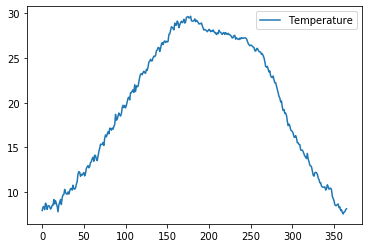

In [47]:
aver_temp2.plot()

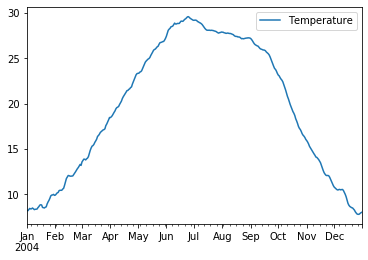

In [40]:
df_avg.plot()

This is the Plot using a window size of 5

In [41]:
df_avg.to_csv('Average_temperature_delhi_year_usingwindow.csv')

In [42]:
date_range = pd.date_range(start = '1979-01-01', end='2019-12-31', freq='D' )
anomal = pd.DataFrame(0.0, columns=['Temperature'], index=date_range)

for date in date_range:
    avg_date = '2004'+str(date)[4:10]
    #print(kdf['Temperature'][str(date)[0:10]])
    anomal['Temperature'][date] = kdf['Temperature'][str(date)[0:10]] - df_avg['Temperature'][avg_date]

In [43]:
anomal

Temperature
1979-01-01     1.287304
1979-01-02     2.055336
1979-01-03     2.362688
1979-01-04     1.046241
1979-01-05     1.021060
...                 ...
2019-12-27    -1.898463
2019-12-28    -3.346530
2019-12-29    -1.644978
2019-12-30    -3.628044
2019-12-31    -3.573033

[14975 rows x 1 columns]

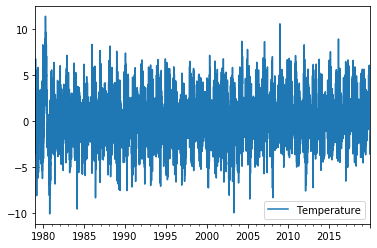

In [44]:
anomal.plot()

In [45]:
anomal.to_csv('Delhi_anomaly2_usingWindow_1979_2019.csv')